[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/corazzon/boostcourse-ds-510/blob/master/k-beauty-oversea-online-sale-output.ipynb)

## 국가(대륙)별/상품군별 온라인쇼핑 해외직접판매액
* 국가통계포털 : http://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1KE10081&vw_cd=MT_ZTITLE&list_id=JF&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_ZTITLE

### K-Beauty는 성장하고 있을까? 해외 직접판매를 한다면 어느 국가로 판매전략을 세우면 좋을까?
* K-Beauty란? [K-Beauty - Wikipedia](https://en.wikipedia.org/wiki/K-Beauty)
* e : 추정치, p : 잠정치, - : 자료없음, ... : 미상자료, x : 비밀보호, ▽ : 시계열 불연 ( 단위 : 백만원 )

## 필요 라이브러리 가져오기

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np
%matplotlib inline

## 한글폰트 설정
* https://github.com/ychoi-kr/koreanize-matplotlib

In [5]:
# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
# colab 에서는 아래 모듈을 설치하고 불러와서 사용하세요.

# !pip install koreanize-matplotlib

# import koreanize_matplotlib

In [6]:
# os 별로 폰트 설정
if os.name == "posix":
    sns.set(font="AppleGothic")
elif os.name == "nt":
    sns.set(font="Malgun Gothic")
    
# 레티나 설정을 해주면 글씨가 좀 더 선명하게 보입니다.\
%config InlineBackend.figure_format = 'retina'

## 데이터 로드하기

In [8]:
from glob import glob

glob("data/*.csv")

['data\\NHIS_OPEN_GJ_2017.CSV',
 'data\\online_oversea_202210.csv',
 'data\\도로교통공단_월별 주야별 교통사고 통계_20231231.csv',
 'data\\상가(상권)정보_의료기관_201909.csv',
 'data\\서울특별시 강남구_생활폐기물배출량_20221019.csv']

In [9]:
# df_raw = pd.read_csv("data/국가_대륙_별_상품군별_온라인쇼핑_해외직접판매액_202002.csv",
#                      encoding="cp949")
df_raw = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/online_oversea_sale.csv.zip",
                     encoding="cp949")
df_raw.shape

(450, 27)

In [10]:
# "국가(대륙)별" 데이터 빈도수 세기
df_raw["국가(대륙)별"].value_counts()

국가(대륙)별
합계            45
미국            45
중국            45
일본            45
아세안(ASEAN)    45
EU            45
중동            45
중남미           45
대양주           45
기타            45
Name: count, dtype: int64

In [11]:
# 미국 데이터만 따로 보기
df_raw[df_raw["국가(대륙)별"] == "미국"]

국가(대륙)별          상품군별   판매유형별 2014 1/4 2014 2/4 2014 3/4 2014 4/4 2015 1/4  \
45      미국            합계       계    25773    22573    21288    26729    39945   
46      미국            합계     면세점        -        -        -        -        -   
47      미국            합계  면세점 이외        -        -        -        -        -   
48      미국    컴퓨터 및 주변기기       계     2216     1666     1776     1675     1469   
49      미국    컴퓨터 및 주변기기     면세점        -        -        -        -        -   
50      미국    컴퓨터 및 주변기기  면세점 이외        -        -        -        -        -   
51      미국    가전·전자·통신기기       계     2875     2758     2894     3527     4397   
52      미국    가전·전자·통신기기     면세점        -        -        -        -        -   
53      미국    가전·전자·통신기기  면세점 이외        -        -        -        -        -   
54      미국         소프트웨어       계       47       57       49      128      182   
55      미국         소프트웨어     면세점        -        -        -        -        -   
56      미국         소프트웨어  면세점 이외        -        -        -        -        -   
57      미국           서 적       계      962      720      934     1006     1074   
58      미국           서 적     면세점        -        -        -        -        -   
59      미국           서 적  면세점 이외        -        -        -        -        -   
60      미국         사무·문구       계       25       10       14       18      568   
61      미국         사무·문구     면세점        -        -        -        -        -   
62      미국         사무·문구  면세점 이외        -        -        -        -        -   
63      미국     음반·비디오·악기       계      787      720      722      821      849   
64      미국     음반·비디오·악기     면세점        -        -        -        -        -   
65      미국     음반·비디오·악기  면세점 이외        -        -        -        -        -   
66      미국  의류 및 패션관련 상품       계     9810     7801     6404     9208     8602   
67      미국  의류 및 패션관련 상품     면세점        -        -        -        -        -   
68      미국  의류 및 패션관련 상품  면세점 이외        -        -        -        -        -   
69      미국      스포츠·레저용품       계      573      539      475      491      541   
70      미국      스포츠·레저용품     면세점        -        -        -        -        -   
71      미국      스포츠·레저용품  면세점 이외        -        -        -        -        -   
72      미국           화장품       계     3740     3713     3399     4595    11223   
73      미국           화장품     면세점        -        -        -        -        -   
74      미국           화장품  면세점 이외        -        -        -        -        -   
75      미국       아동·유아용품       계      583      546      499      610     1099   
76      미국       아동·유아용품     면세점        -        -        -        -        -   
77      미국       아동·유아용품  면세점 이외        -        -        -        -        -   
78      미국         음·식료품       계      381      415      405      673      577   
79      미국         음·식료품     면세점        -        -        -        -        -   
80      미국         음·식료품  면세점 이외        -        -        -        -        -   
81      미국         농축수산물       계       94       98      111      160      189   
82      미국         농축수산물     면세점        -        -        -        -        -   
83      미국         농축수산물  면세점 이외        -        -        -        -        -   
84      미국  생활용품 및 자동차용품       계     1931     1915     1815     1871     6605   
85      미국  생활용품 및 자동차용품     면세점        -        -        -        -        -   
86      미국  생활용품 및 자동차용품  면세점 이외        -        -        -        -        -   
87      미국           기 타       계     1749     1615     1791     1946     2570   
88      미국           기 타     면세점        -        -        -        -        -   
89      미국           기 타  면세점 이외        -        -        -        -        -   

   2015 2/4 2015 3/4  ... 2017 3/4 2017 4/4 2018 1/4 2018 2/4 2018 3/4  \
45    26654    28647  ...    41927    53209    41204    39108    36536   
46        -        -  ...     9469    12177     5184     3603     2317   
47        -        -  ...    32458    41032    36020  

## 분석과 시각화를 위한 tidy data 만들기
* https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

In [13]:
# melt 함수: 행에 있는 데이터를 열로 옮김
# id_vars로 id값으로 사용할 열을 지정하고, value_vars에는 value으로 들어가는 열을 지정
df_raw.melt(id_vars=["국가(대륙)별", "상품군별", "판매유형별"])

국가(대륙)별          상품군별   판매유형별     variable   value
0          합계            합계       계     2014 1/4  148272
1          합계            합계     면세점     2014 1/4       -
2          합계            합계  면세점 이외     2014 1/4       -
3          합계    컴퓨터 및 주변기기       계     2014 1/4    4915
4          합계    컴퓨터 및 주변기기     면세점     2014 1/4       -
...       ...           ...     ...          ...     ...
10795      기타  생활용품 및 자동차용품     면세점  2019 4/4 p)       0
10796      기타  생활용품 및 자동차용품  면세점 이외  2019 4/4 p)     531
10797      기타           기 타       계  2019 4/4 p)    1094
10798      기타           기 타     면세점  2019 4/4 p)       1
10799      기타           기 타  면세점 이외  2019 4/4 p)    1093

[10800 rows x 5 columns]

In [14]:
df = df_raw.melt(id_vars=["국가(대륙)별", "상품군별", "판매유형별"], var_name="기간", value_name="백만원")
df.head()

국가(대륙)별        상품군별   판매유형별        기간     백만원
0      합계          합계       계  2014 1/4  148272
1      합계          합계     면세점  2014 1/4       -
2      합계          합계  면세점 이외  2014 1/4       -
3      합계  컴퓨터 및 주변기기       계  2014 1/4    4915
4      합계  컴퓨터 및 주변기기     면세점  2014 1/4       -

## 데이터 전처리
### 기간에서 연도를 분리하기

In [16]:
df["기간"]

0           2014 1/4
1           2014 1/4
2           2014 1/4
3           2014 1/4
4           2014 1/4
            ...     
10795    2019 4/4 p)
10796    2019 4/4 p)
10797    2019 4/4 p)
10798    2019 4/4 p)
10799    2019 4/4 p)
Name: 기간, Length: 10800, dtype: object

In [17]:
# split()을 사용하면 공백으로 데이터를 분리
# map() 안에 lambda 함수를 넣어 x.split()한 데이터의 첫번째 인덱스 값을 integer 형으로 변경
df["기간"].map(lambda x: int(x.split()[0]))

0        2014
1        2014
2        2014
3        2014
4        2014
         ... 
10795    2019
10796    2019
10797    2019
10798    2019
10799    2019
Name: 기간, Length: 10800, dtype: int64

In [18]:
# "연도" 열 새로 생성
df["연도"] = df["기간"].map(lambda x: int(x.split()[0]))
df.head()

국가(대륙)별        상품군별   판매유형별        기간     백만원    연도
0      합계          합계       계  2014 1/4  148272  2014
1      합계          합계     면세점  2014 1/4       -  2014
2      합계          합계  면세점 이외  2014 1/4       -  2014
3      합계  컴퓨터 및 주변기기       계  2014 1/4    4915  2014
4      합계  컴퓨터 및 주변기기     면세점  2014 1/4       -  2014

In [19]:
# "분기" 열 새로 생성
df["분기"] = df["기간"].map(lambda x: int(x.split()[1].split("/")[0]))
df.head()

국가(대륙)별        상품군별   판매유형별        기간     백만원    연도  분기
0      합계          합계       계  2014 1/4  148272  2014   1
1      합계          합계     면세점  2014 1/4       -  2014   1
2      합계          합계  면세점 이외  2014 1/4       -  2014   1
3      합계  컴퓨터 및 주변기기       계  2014 1/4    4915  2014   1
4      합계  컴퓨터 및 주변기기     면세점  2014 1/4       -  2014   1

### 금액을 수치데이터로 표현하기 위해 데이터 타입 변경하기

In [21]:
# -로 표시된 값은 결측치이므로 NaN으로 대치(replace)
# 숫자는 소숫점으로 변경
df["백만원"] = df["백만원"].replace("-", np.nan).astype(float)
df["백만원"]

0        148272.0
1             NaN
2             NaN
3          4915.0
4             NaN
           ...   
10795         0.0
10796       531.0
10797      1094.0
10798         1.0
10799      1093.0
Name: 백만원, Length: 10800, dtype: float64

### 필요없는 데이터 제거하기

In [23]:
# "합계" 데이터는 따로 구할 수 있기 때문에 전체 데이터에서 제거
# df["국가(대륙)별"] != "합계"
# df["상품군별"] != "합계"
# df["판매유형별"] != "계"
df = df[(df["국가(대륙)별"]!="합계")&(df["상품군별"]!="합계")].copy()
df

국가(대륙)별          상품군별   판매유형별           기간     백만원    연도  분기
48         미국    컴퓨터 및 주변기기       계     2014 1/4  2216.0  2014   1
49         미국    컴퓨터 및 주변기기     면세점     2014 1/4     NaN  2014   1
50         미국    컴퓨터 및 주변기기  면세점 이외     2014 1/4     NaN  2014   1
51         미국    가전·전자·통신기기       계     2014 1/4  2875.0  2014   1
52         미국    가전·전자·통신기기     면세점     2014 1/4     NaN  2014   1
...       ...           ...     ...          ...     ...   ...  ..
10795      기타  생활용품 및 자동차용품     면세점  2019 4/4 p)     0.0  2019   4
10796      기타  생활용품 및 자동차용품  면세점 이외  2019 4/4 p)   531.0  2019   4
10797      기타           기 타       계  2019 4/4 p)  1094.0  2019   4
10798      기타           기 타     면세점  2019 4/4 p)     1.0  2019   4
10799      기타           기 타  면세점 이외  2019 4/4 p)  1093.0  2019   4

[9072 rows x 7 columns]

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9072 entries, 48 to 10799
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   국가(대륙)별  9072 non-null   object 
 1   상품군별     9072 non-null   object 
 2   판매유형별    9072 non-null   object 
 3   기간       9072 non-null   object 
 4   백만원      6048 non-null   float64
 5   연도       9072 non-null   int64  
 6   분기       9072 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 567.0+ KB


In [25]:
# 백만원에 결측치 존재
df.isnull().sum()

국가(대륙)별       0
상품군별          0
판매유형별         0
기간            0
백만원        3024
연도            0
분기            0
dtype: int64

## K-Beauty 시각화
### 전체 상품군 판매액

In [27]:
df_total = df[df["판매유형별"]=="계"].copy()
df_total.head()

국가(대륙)별        상품군별 판매유형별        기간     백만원    연도  분기
48      미국  컴퓨터 및 주변기기     계  2014 1/4  2216.0  2014   1
51      미국  가전·전자·통신기기     계  2014 1/4  2875.0  2014   1
54      미국       소프트웨어     계  2014 1/4    47.0  2014   1
57      미국         서 적     계  2014 1/4   962.0  2014   1
60      미국       사무·문구     계  2014 1/4    25.0  2014   1

<Axes: xlabel='연도', ylabel='백만원'>

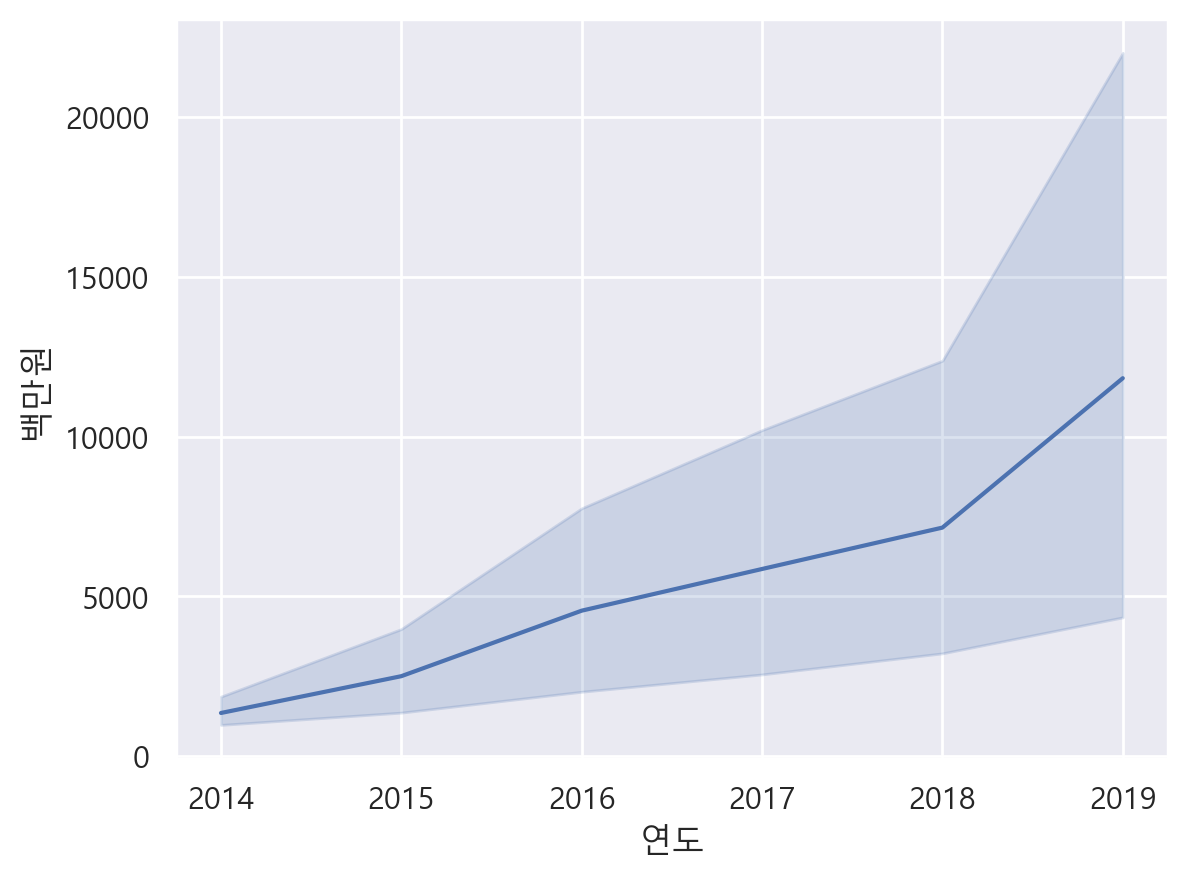

In [28]:
# 연도에 따른 판매액을 그래프로 그림
sns.lineplot(data=df_total, x="연도", y="백만원")

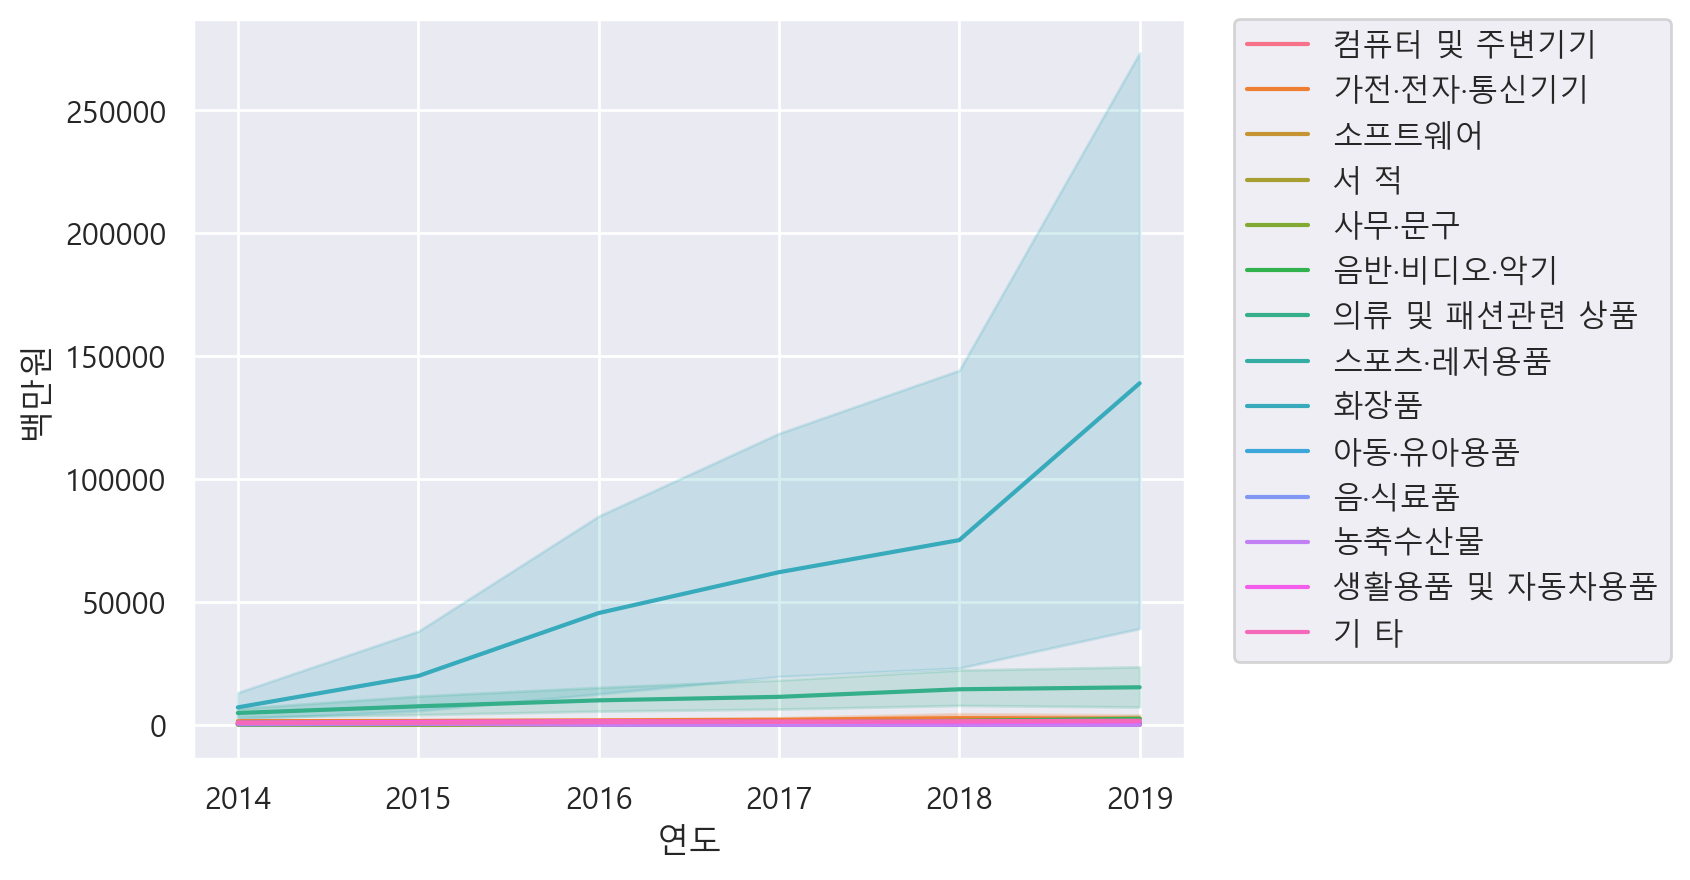

In [29]:
# 상품군 별로 다른 색상으로 표시
# legend 값을 밖에 표시하는 소스코드를 stack overflow에서 가져옴
sns.lineplot(data=df_total, x="연도", y="백만원", hue="상품군별")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

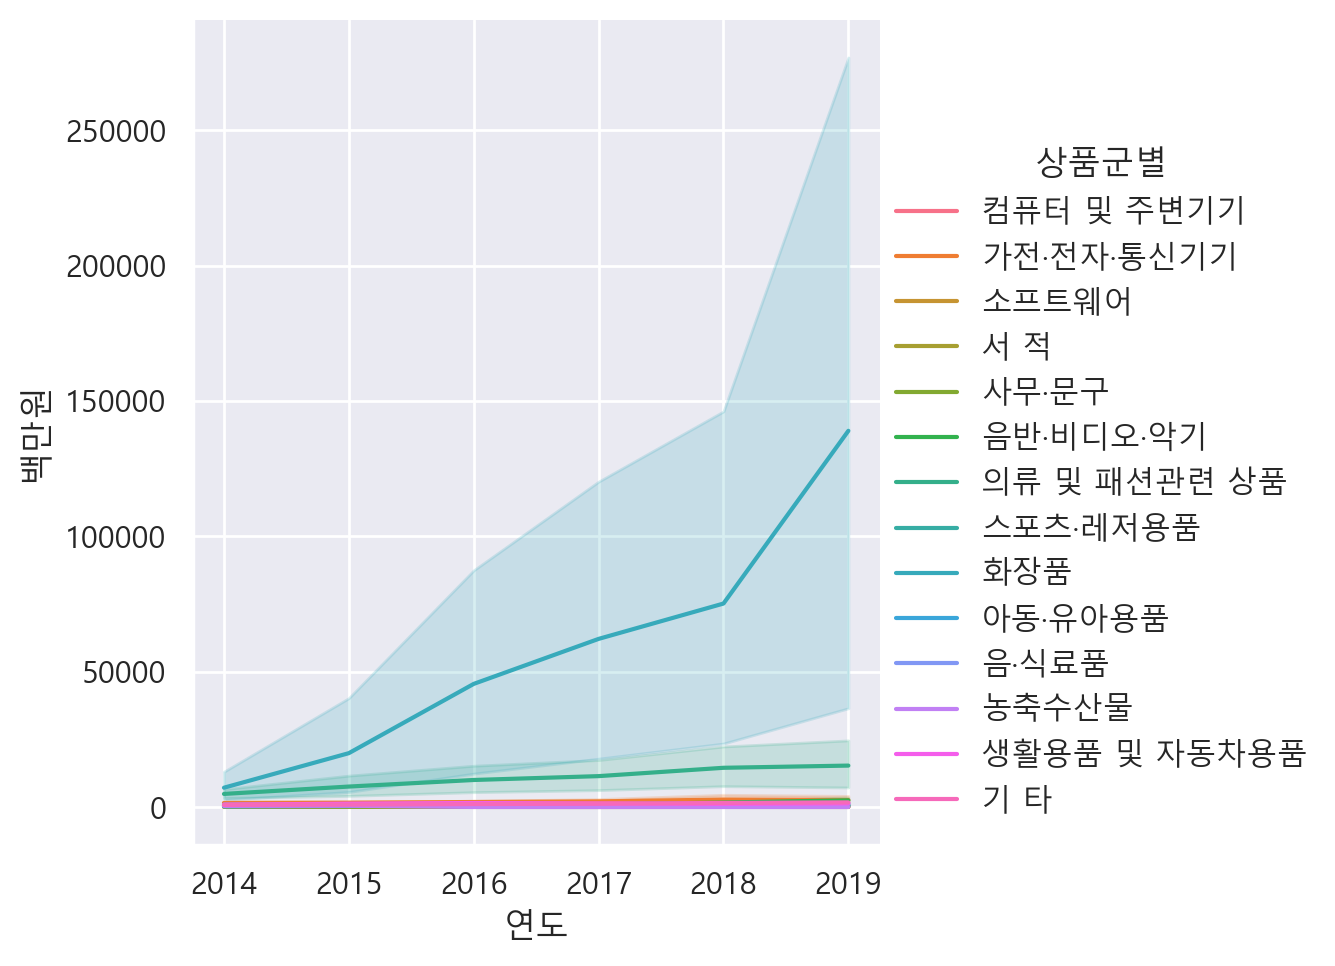

In [30]:
# replot을 lineplot의 서브플롯을 그리기 위해 사용
# kind의 가본값이 scatter이므로 line으로 바꿔줌
sns.relplot(data=df_total, x="연도", y="백만원", hue="상품군별", kind="line")

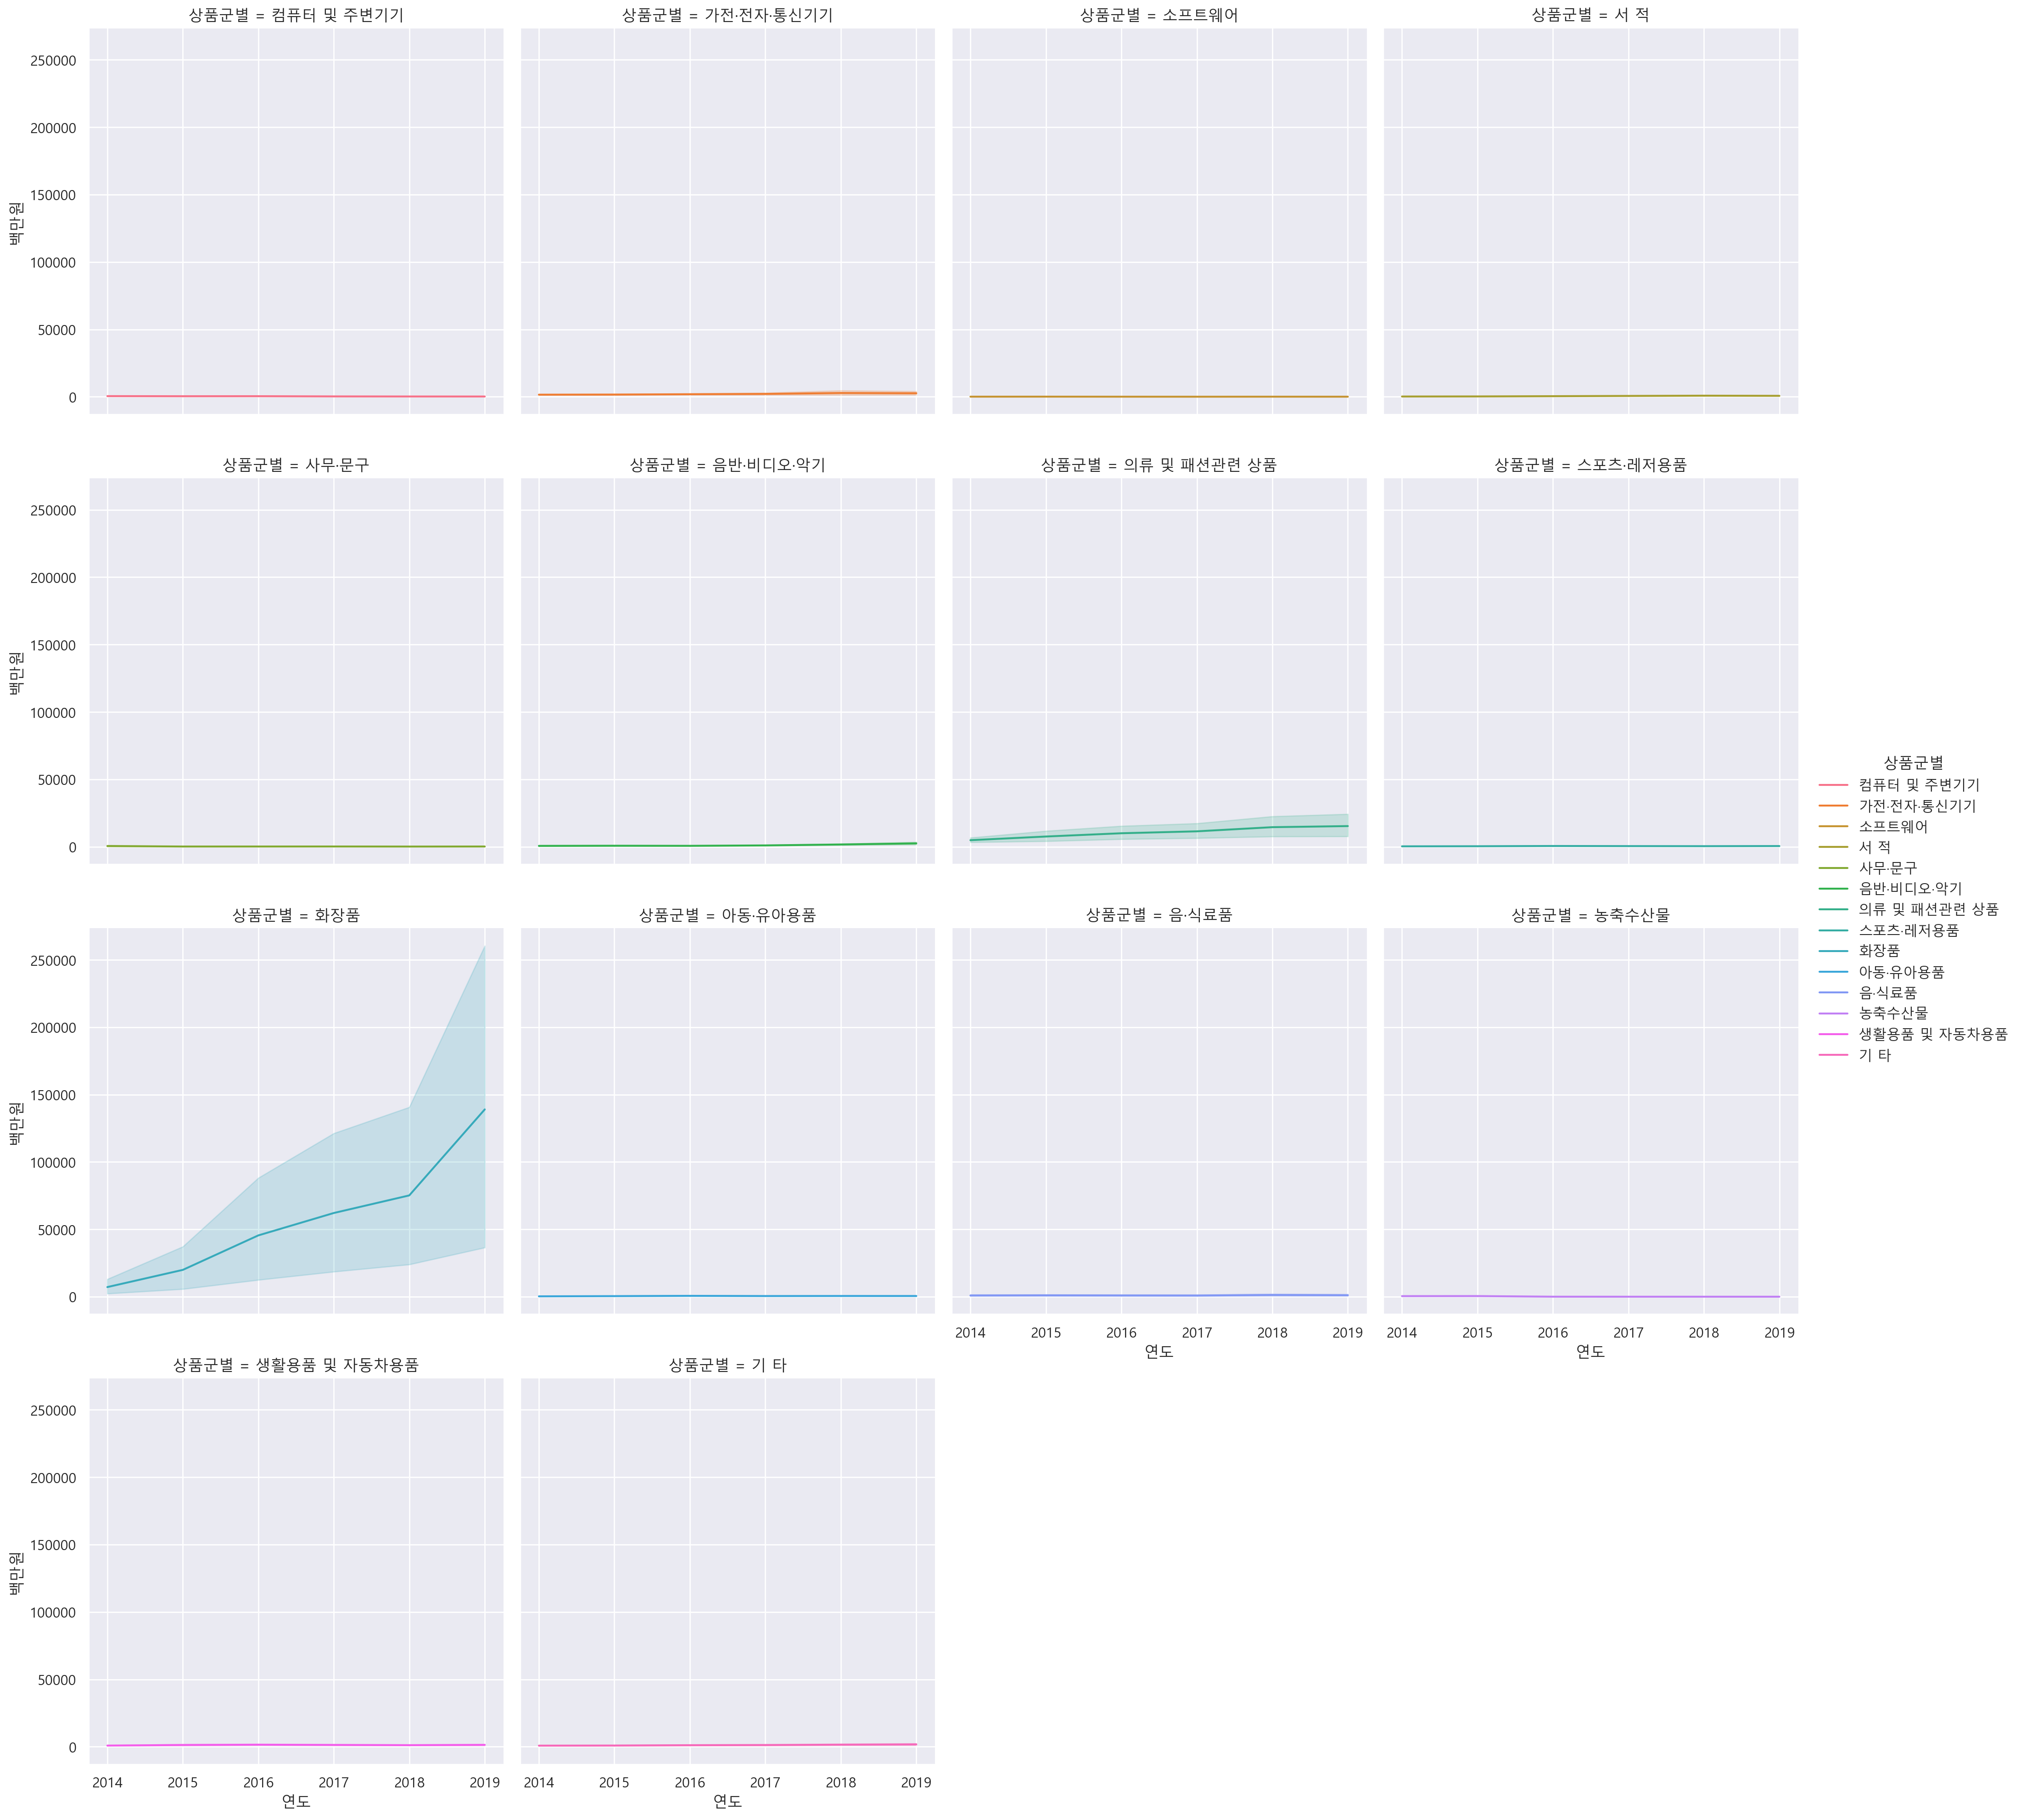

In [31]:
# 상품군별로 색상을 다르게 하기 위해 col 옵션 활용
# 한 행에 4개를 표시하기 위해 col_wrap 옵션 사용
sns.relplot(data=df_total, x="연도", y="백만원", hue="상품군별", kind="line", col="상품군별", col_wrap=4)

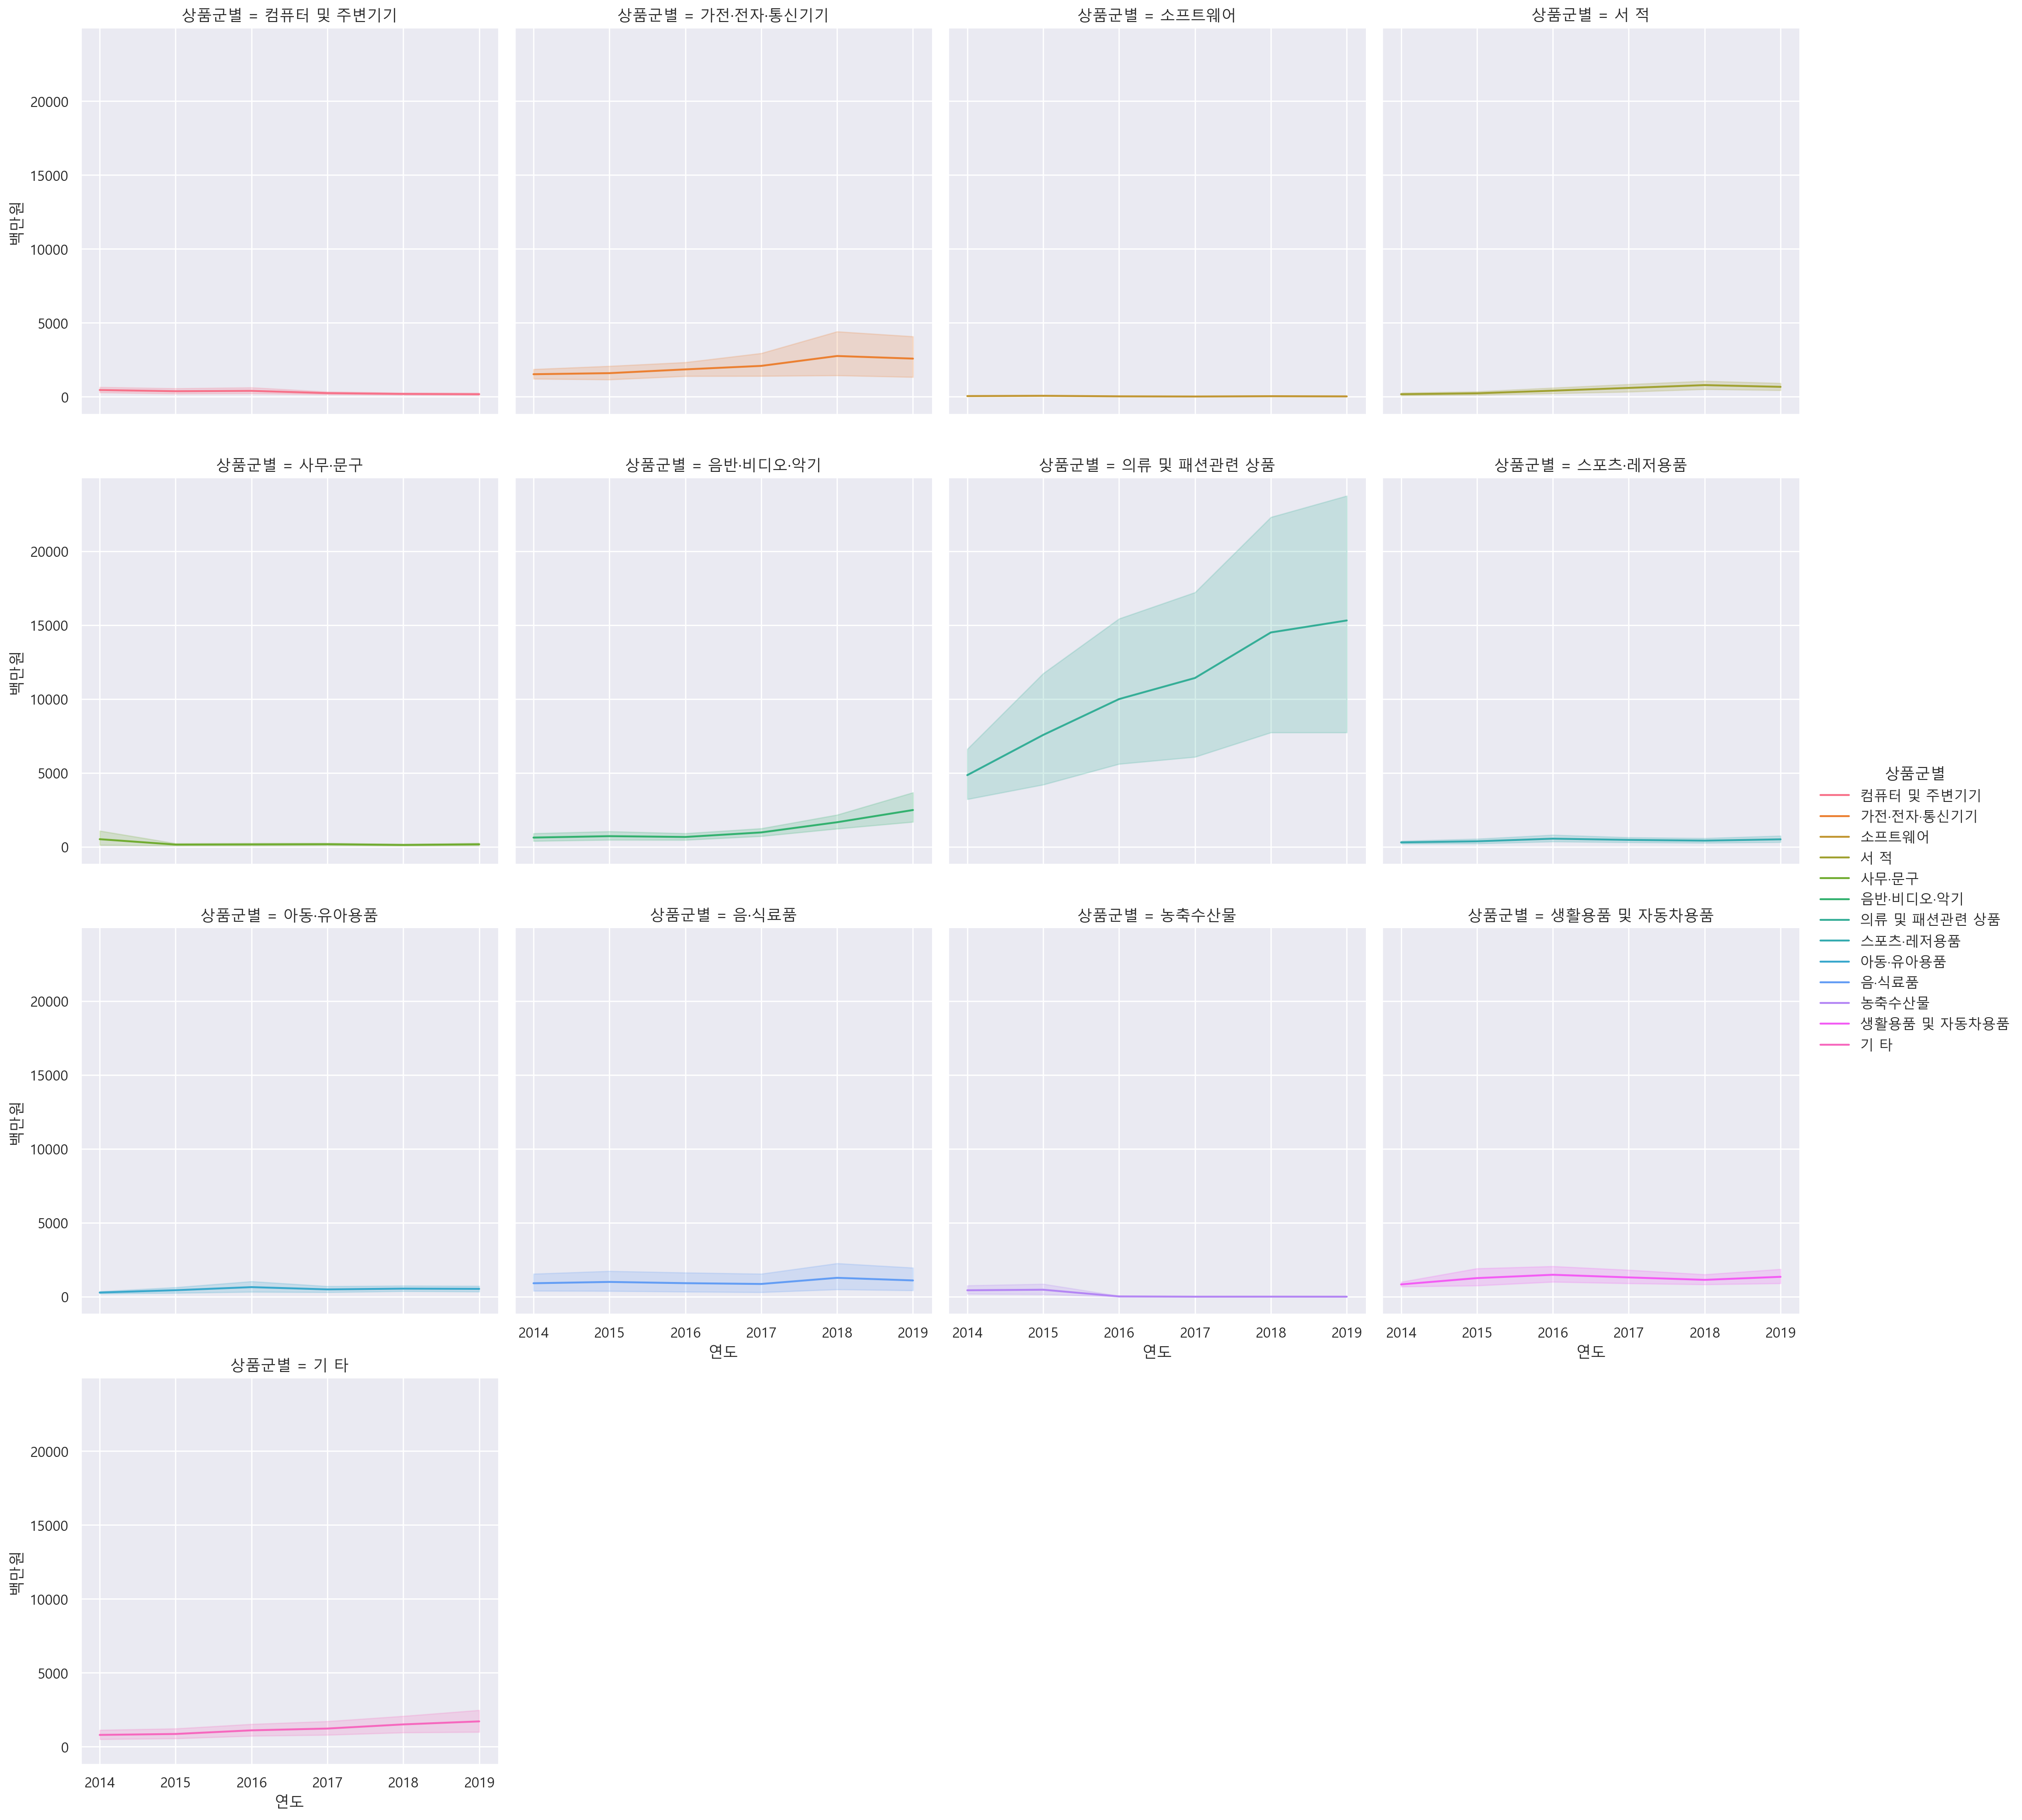

In [32]:
# 해외직접판매액이 꾸준히 증가하는 화장품만 뺀 df_sub 생성
df_sub = df_total[~df_total["상품군별"].isin(["화장품"])].copy()
sns.relplot(data=df_sub, x="연도", y="백만원", hue="상품군별", col="상품군별", col_wrap=4, kind="line")

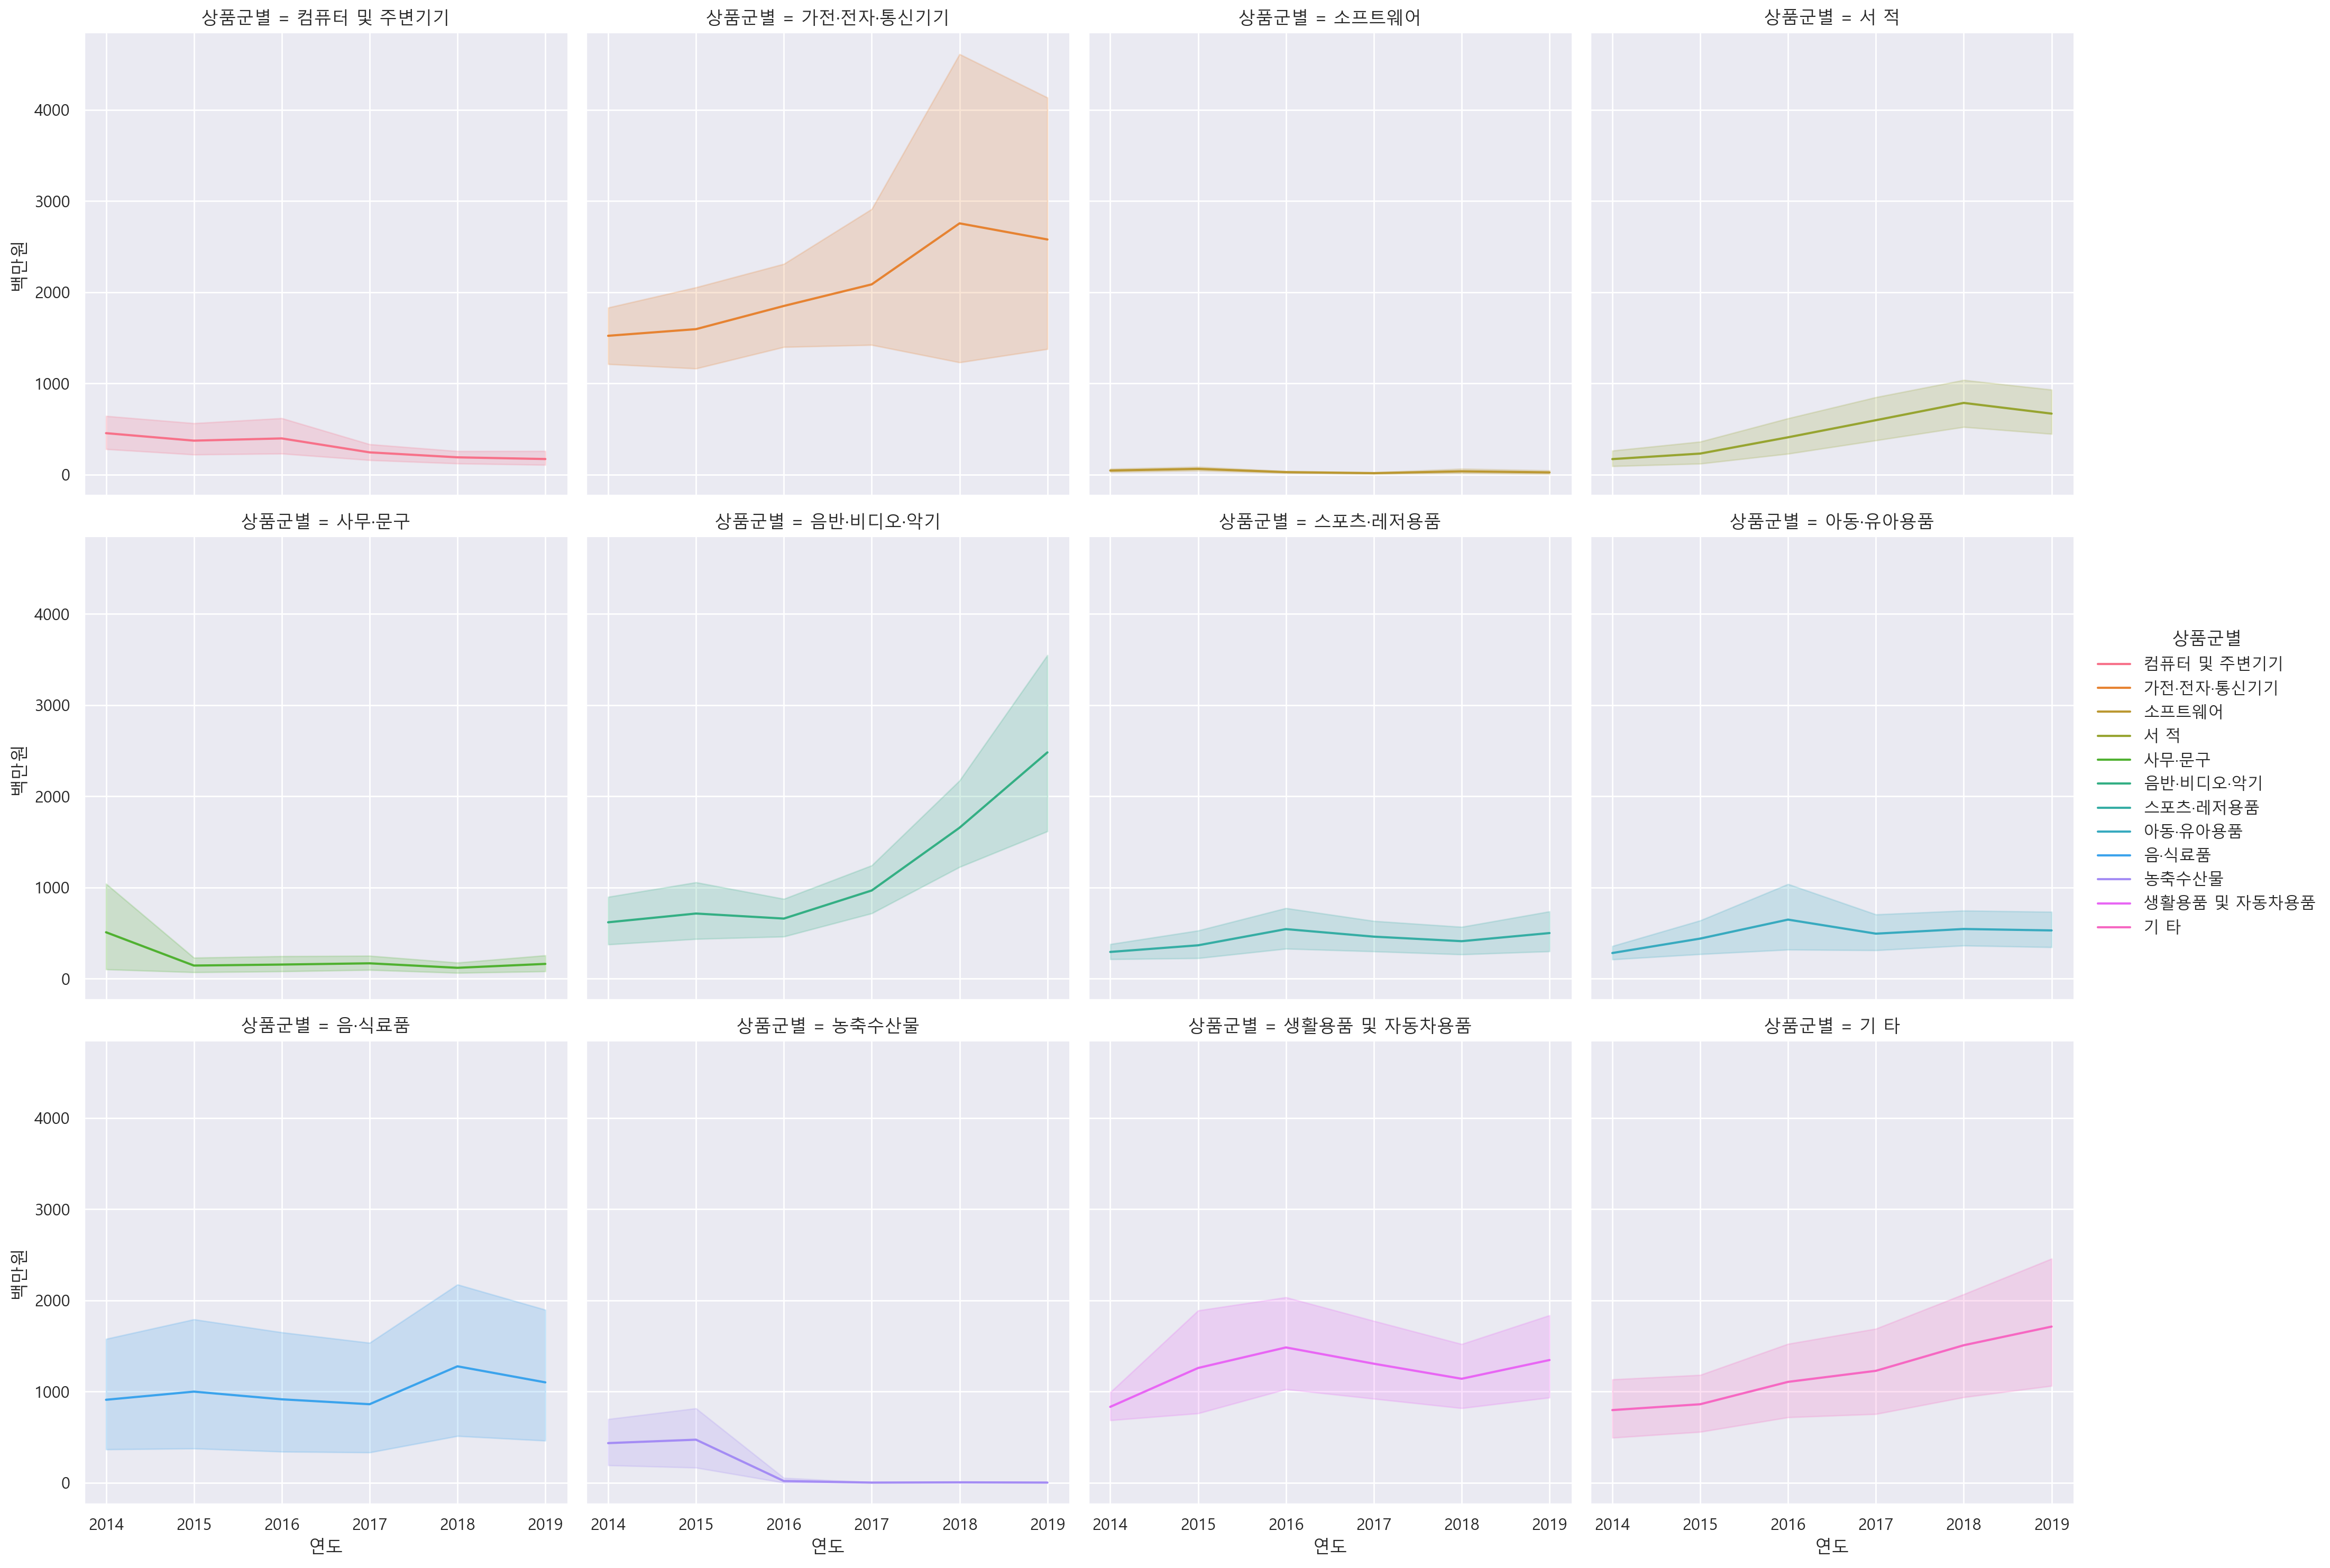

In [33]:
# 화장품 다음으로 판매액이 두드러지는 의류, 패션 상품도 빼고 그래프 그리기
df_sub = df_total[~df_total["상품군별"].isin(["화장품", "의류 및 패션관련 상품"])].copy()
sns.relplot(data=df_sub, x="연도", y="백만원", hue="상품군별", col="상품군별", col_wrap=4, kind="line")
# 음반 쪽 판매가 두드러지게 나타남

### 화장품의 온라인쇼핑 해외직접판매액

In [35]:
# 상품군별이 화장품인 데이터를 가져옴
df_cosmetic = df_total[df_total["상품군별"]=="화장품"].copy()
df_cosmetic.head()

국가(대륙)별 상품군별 판매유형별        기간      백만원    연도  분기
72           미국  화장품     계  2014 1/4   3740.0  2014   1
117          중국  화장품     계  2014 1/4  32235.0  2014   1
162          일본  화장품     계  2014 1/4   1034.0  2014   1
207  아세안(ASEAN)  화장품     계  2014 1/4    398.0  2014   1
252          EU  화장품     계  2014 1/4    937.0  2014   1

<Axes: xlabel='연도', ylabel='백만원'>

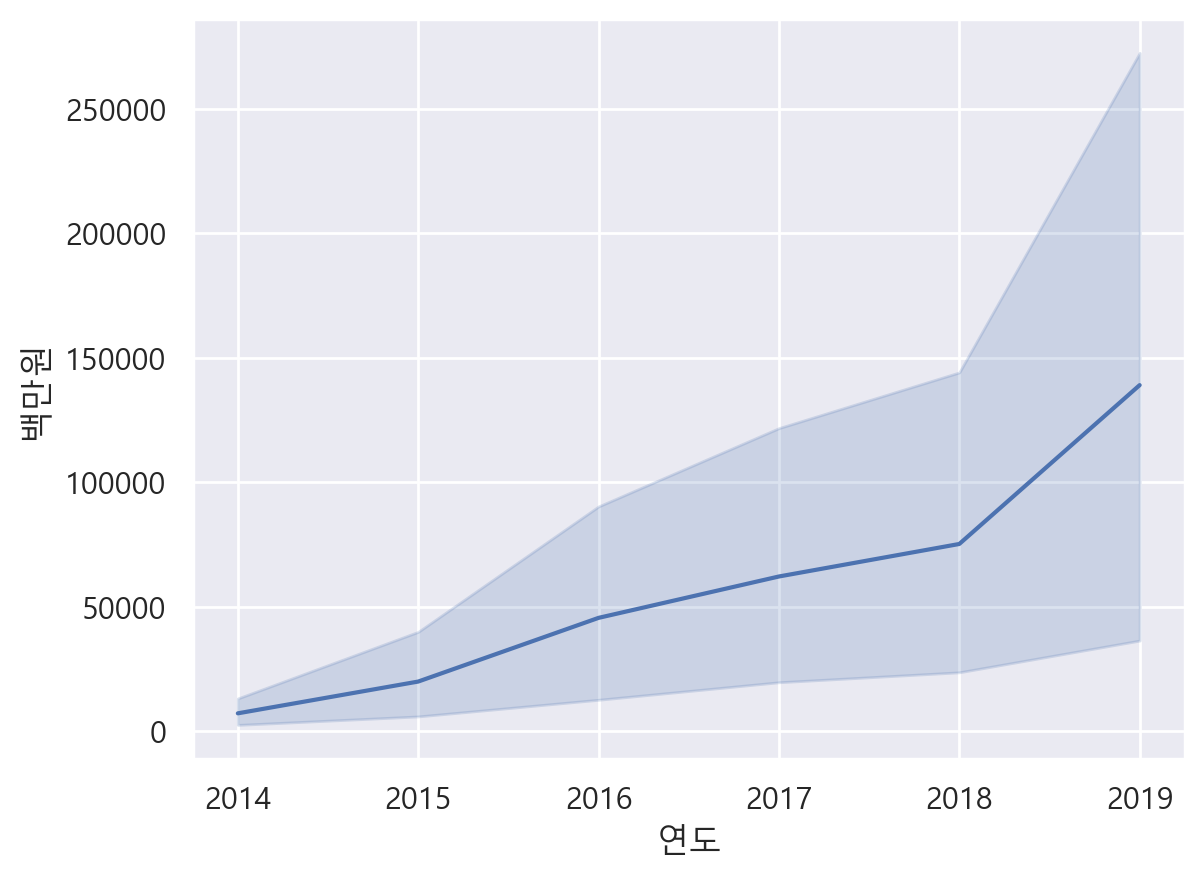

In [36]:
# 화장품의 시각화 그래프 그리기 (연도별)
sns.lineplot(data=df_cosmetic, x="연도", y="백만원")

<Axes: xlabel='연도', ylabel='백만원'>

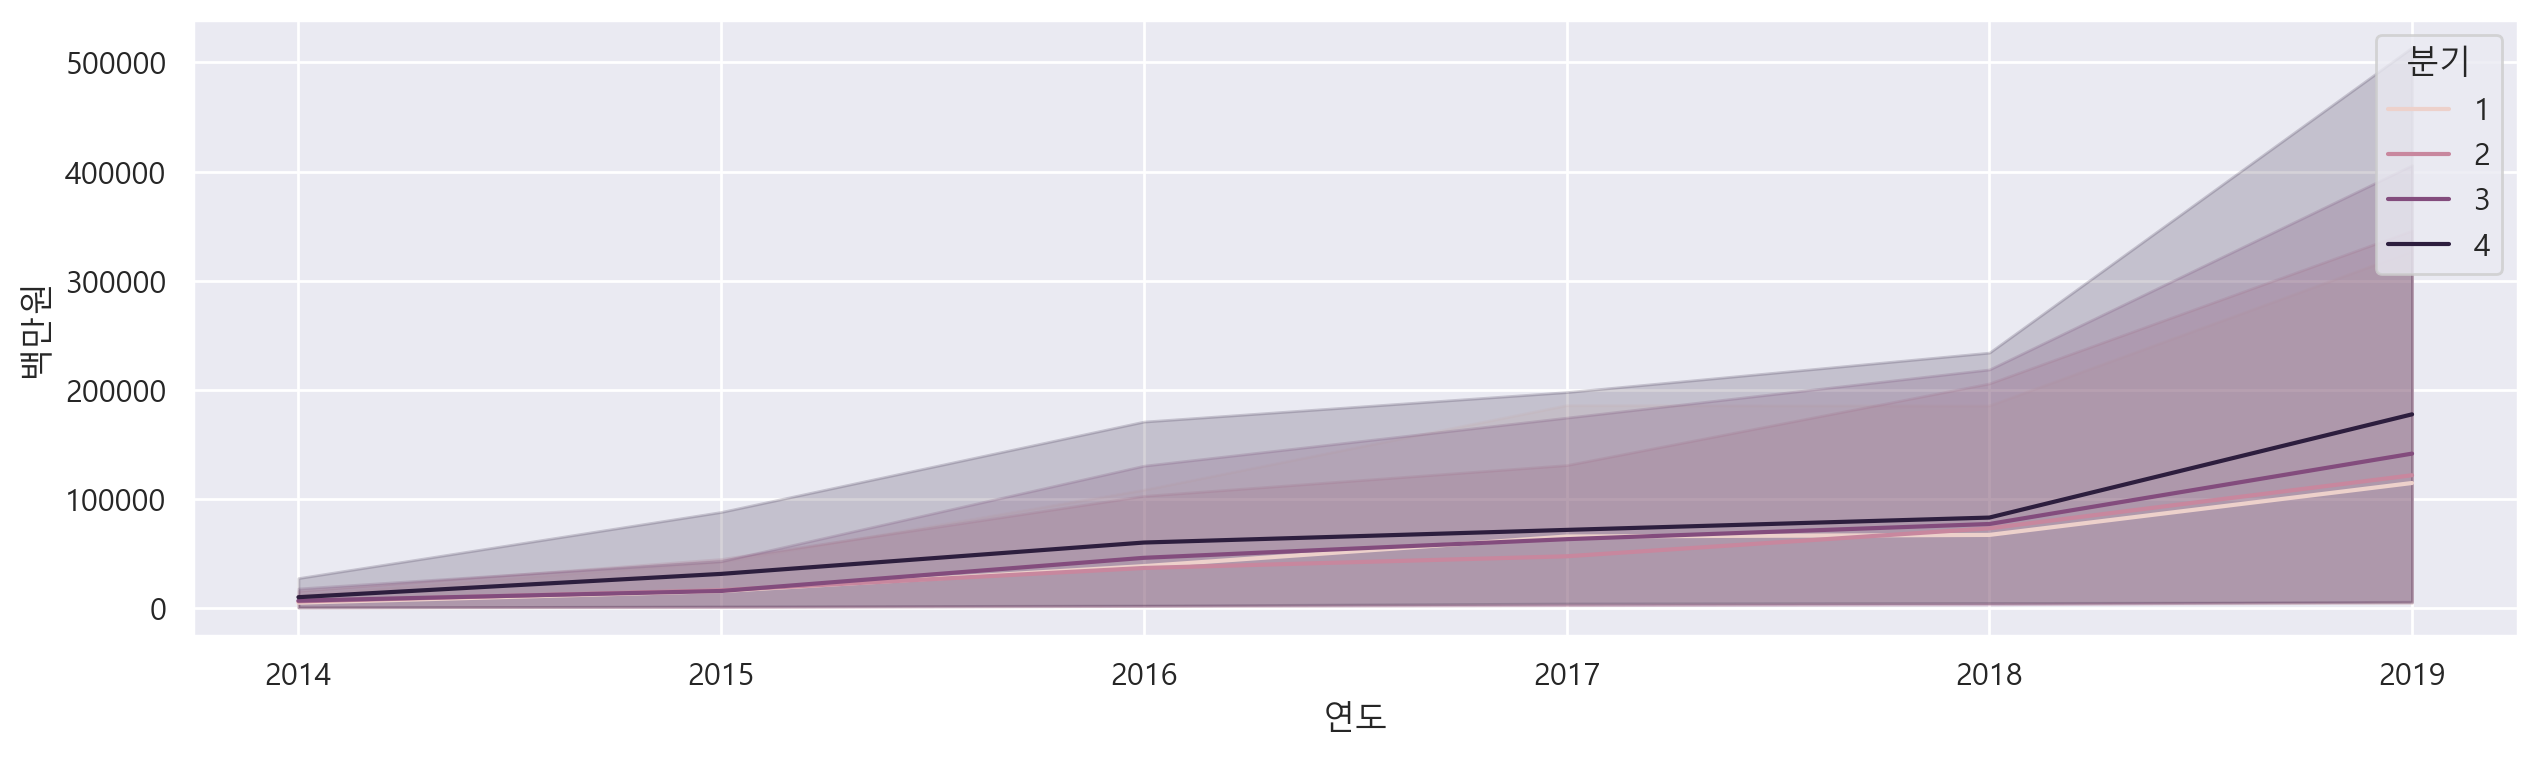

In [37]:
# 분기 별 그래프 그리기
plt.figure(figsize=(15,4))
sns.lineplot(data=df_cosmetic, x="연도", y="백만원", hue="분기")

<Axes: xlabel='기간', ylabel='백만원'>

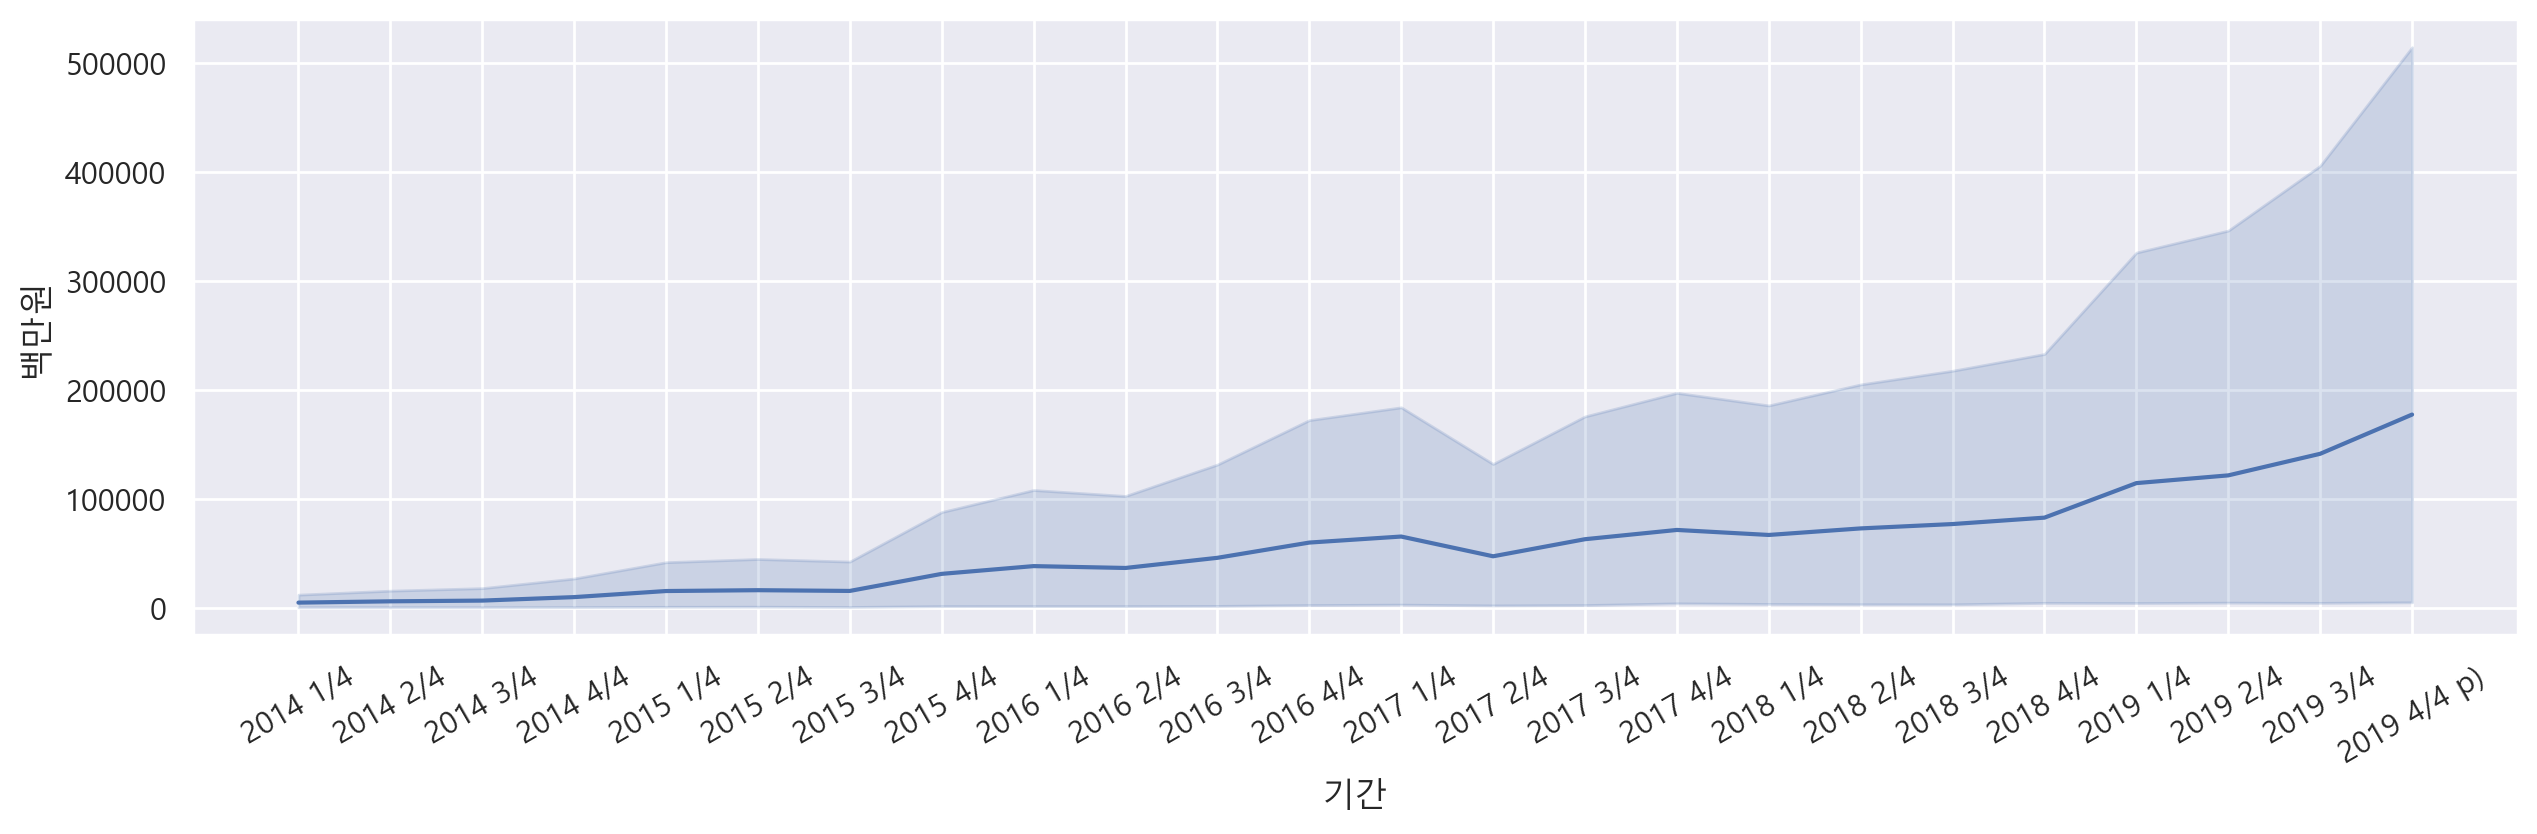

In [38]:
# 연도가 아닌 기간으로 그래프 그리기
# 글씨를 겹쳐지지 않게 하기위해 xticks() 사용해 글자 회전
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic, x="기간", y="백만원")
# 화장품 판매액의 꾸준한 증가 확인 가능

<Axes: xlabel='기간', ylabel='백만원'>

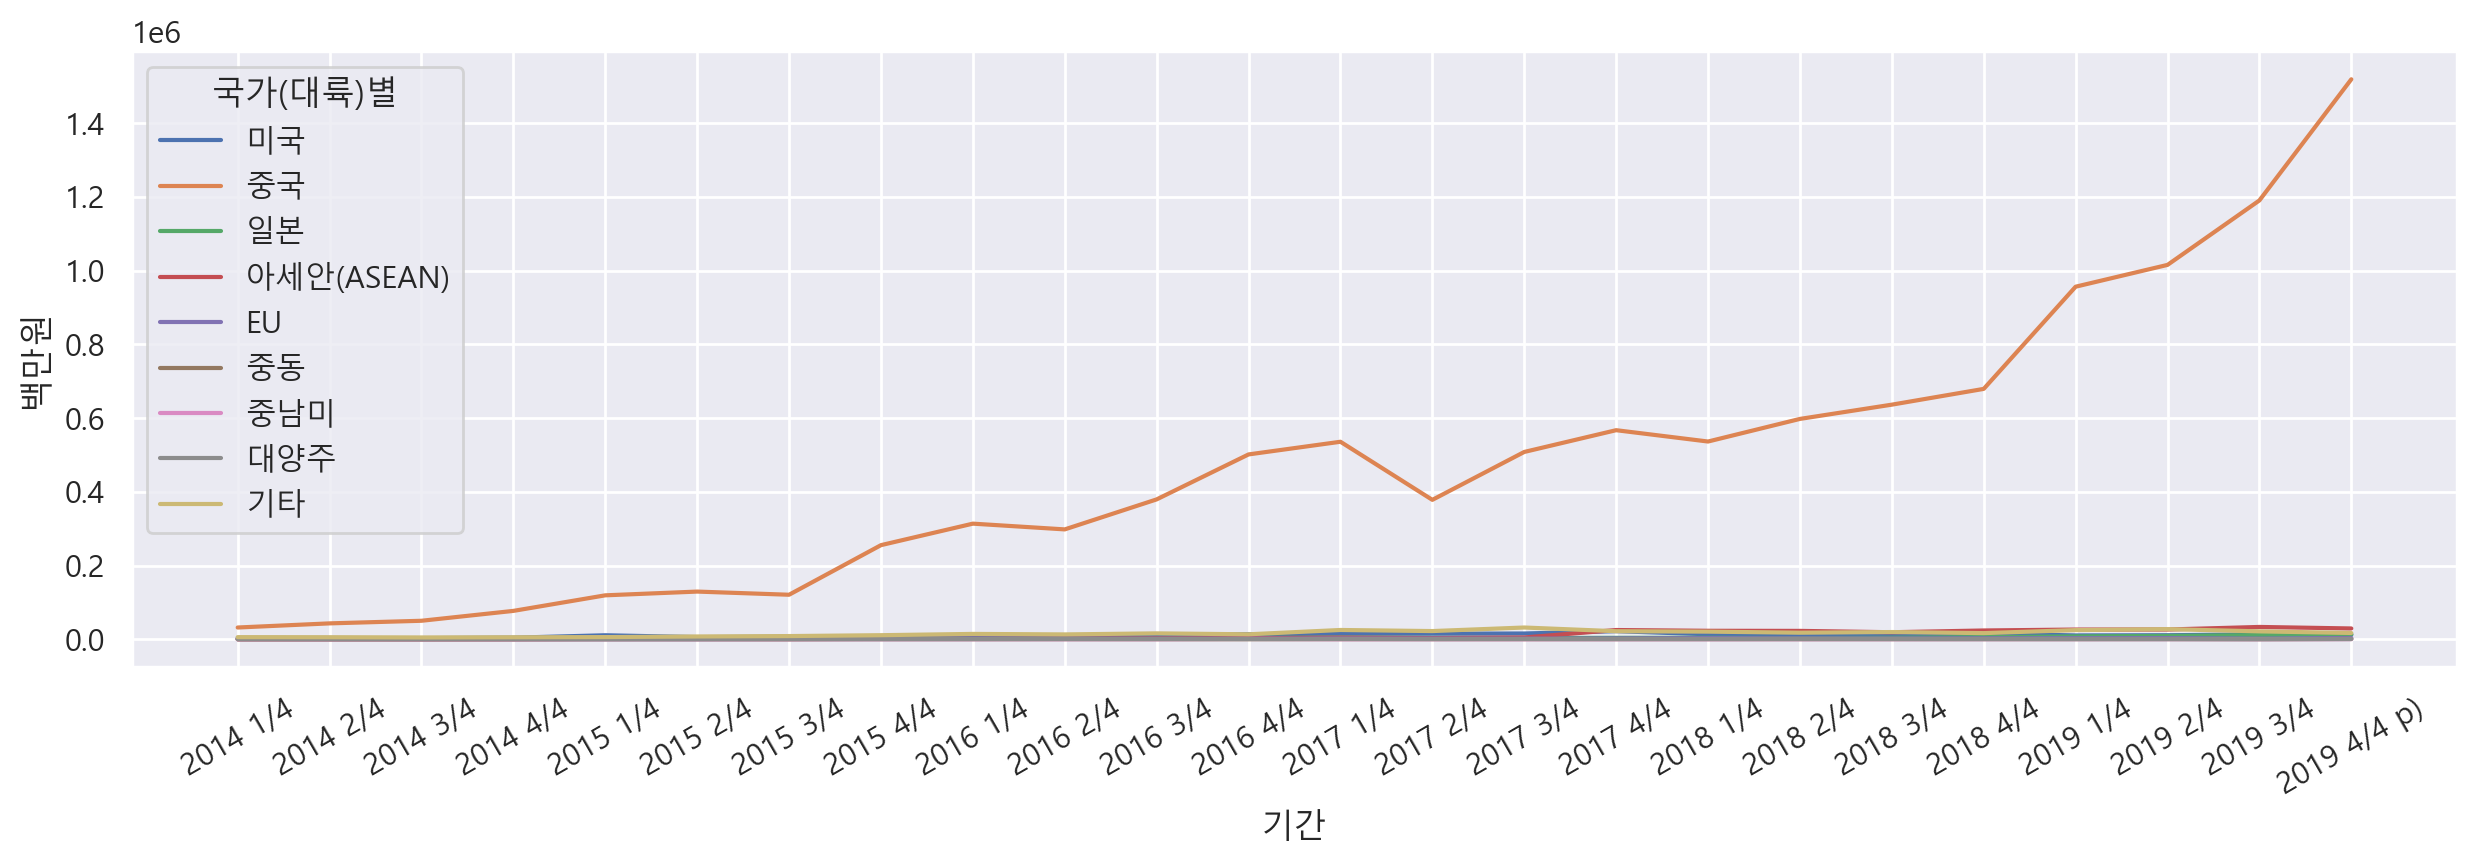

In [39]:
# 국가(대륙)별 그래프 그리기
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic, x="기간", y="백만원", hue="국가(대륙)별")
# 중국에서의 판매액이 가장 많은 것 확인 가능

<Axes: xlabel='기간', ylabel='백만원'>

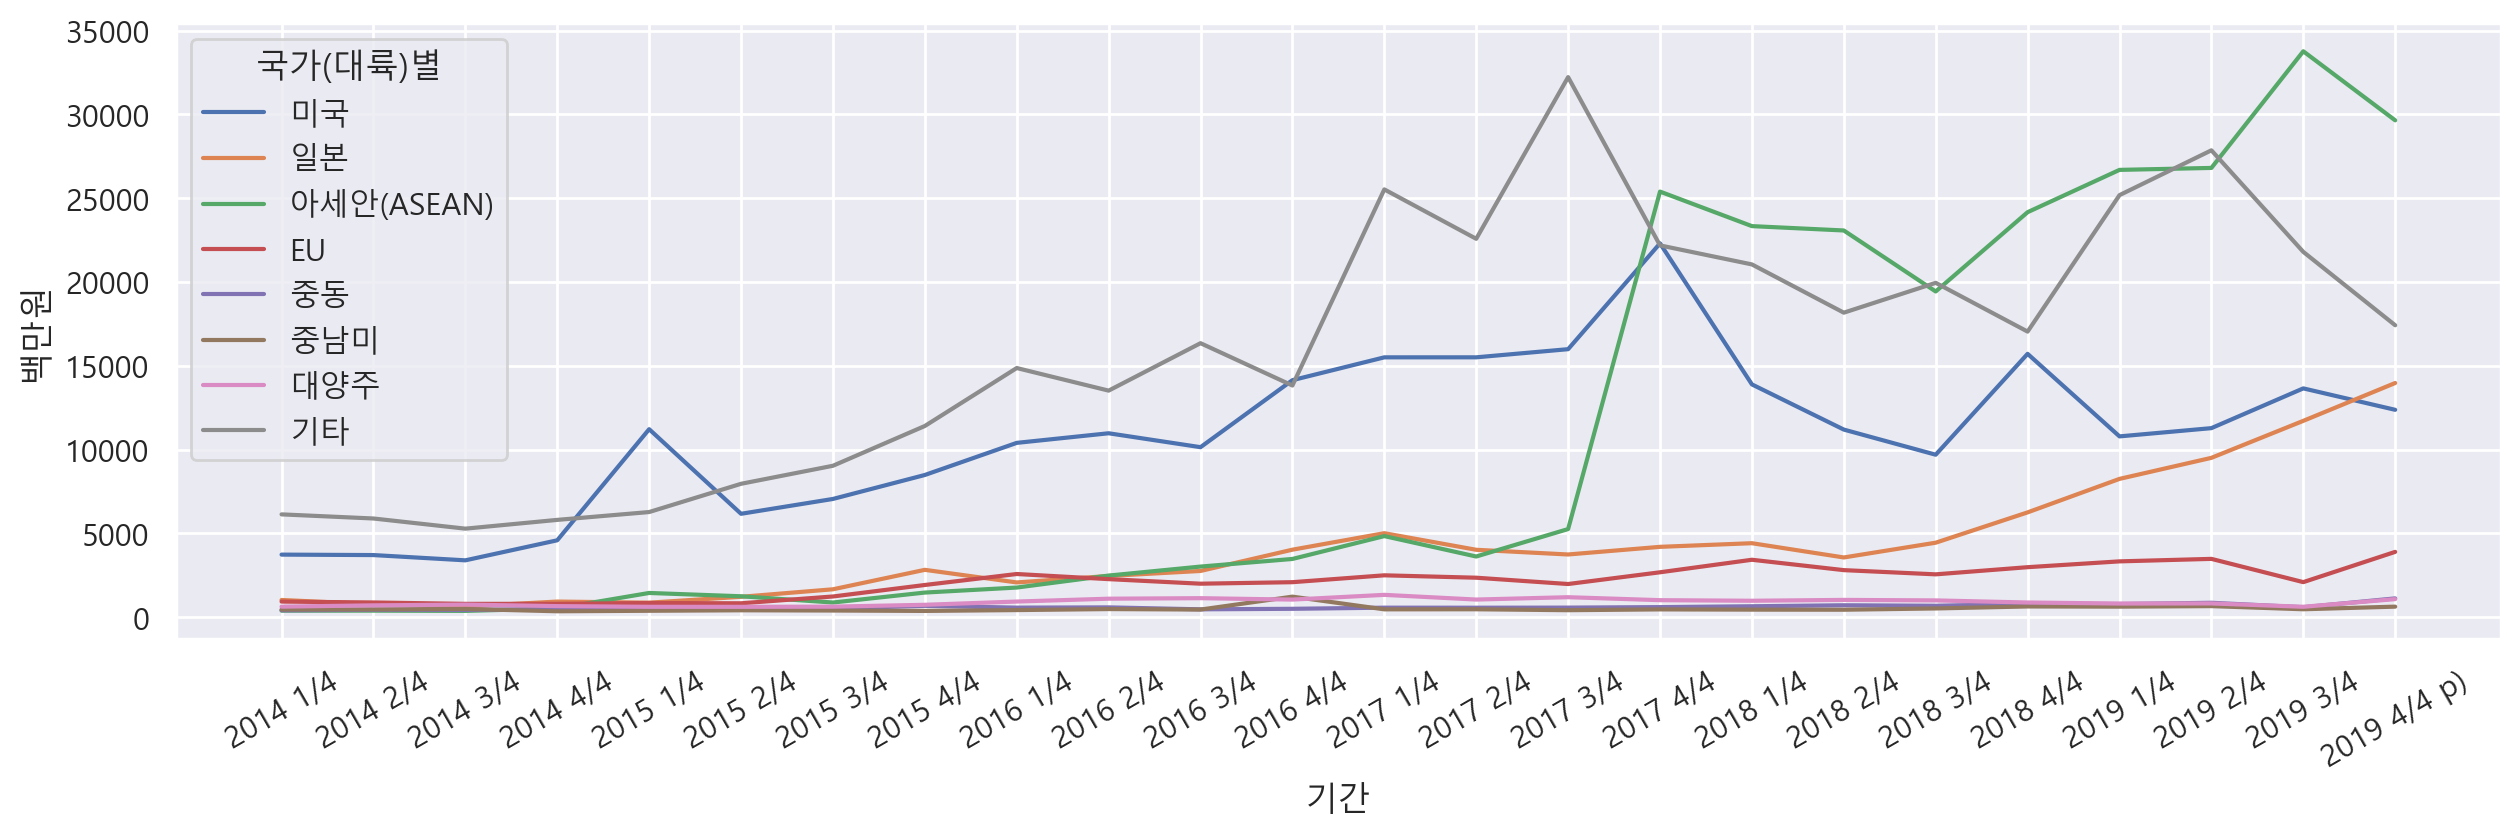

In [40]:
# 중국을 뺸 국가(대륙별) 그래프 그리기
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic[df_cosmetic["국가(대륙)별"]!="중국"], x="기간", y="백만원", hue="국가(대륙)별")

<Axes: xlabel='기간', ylabel='백만원'>

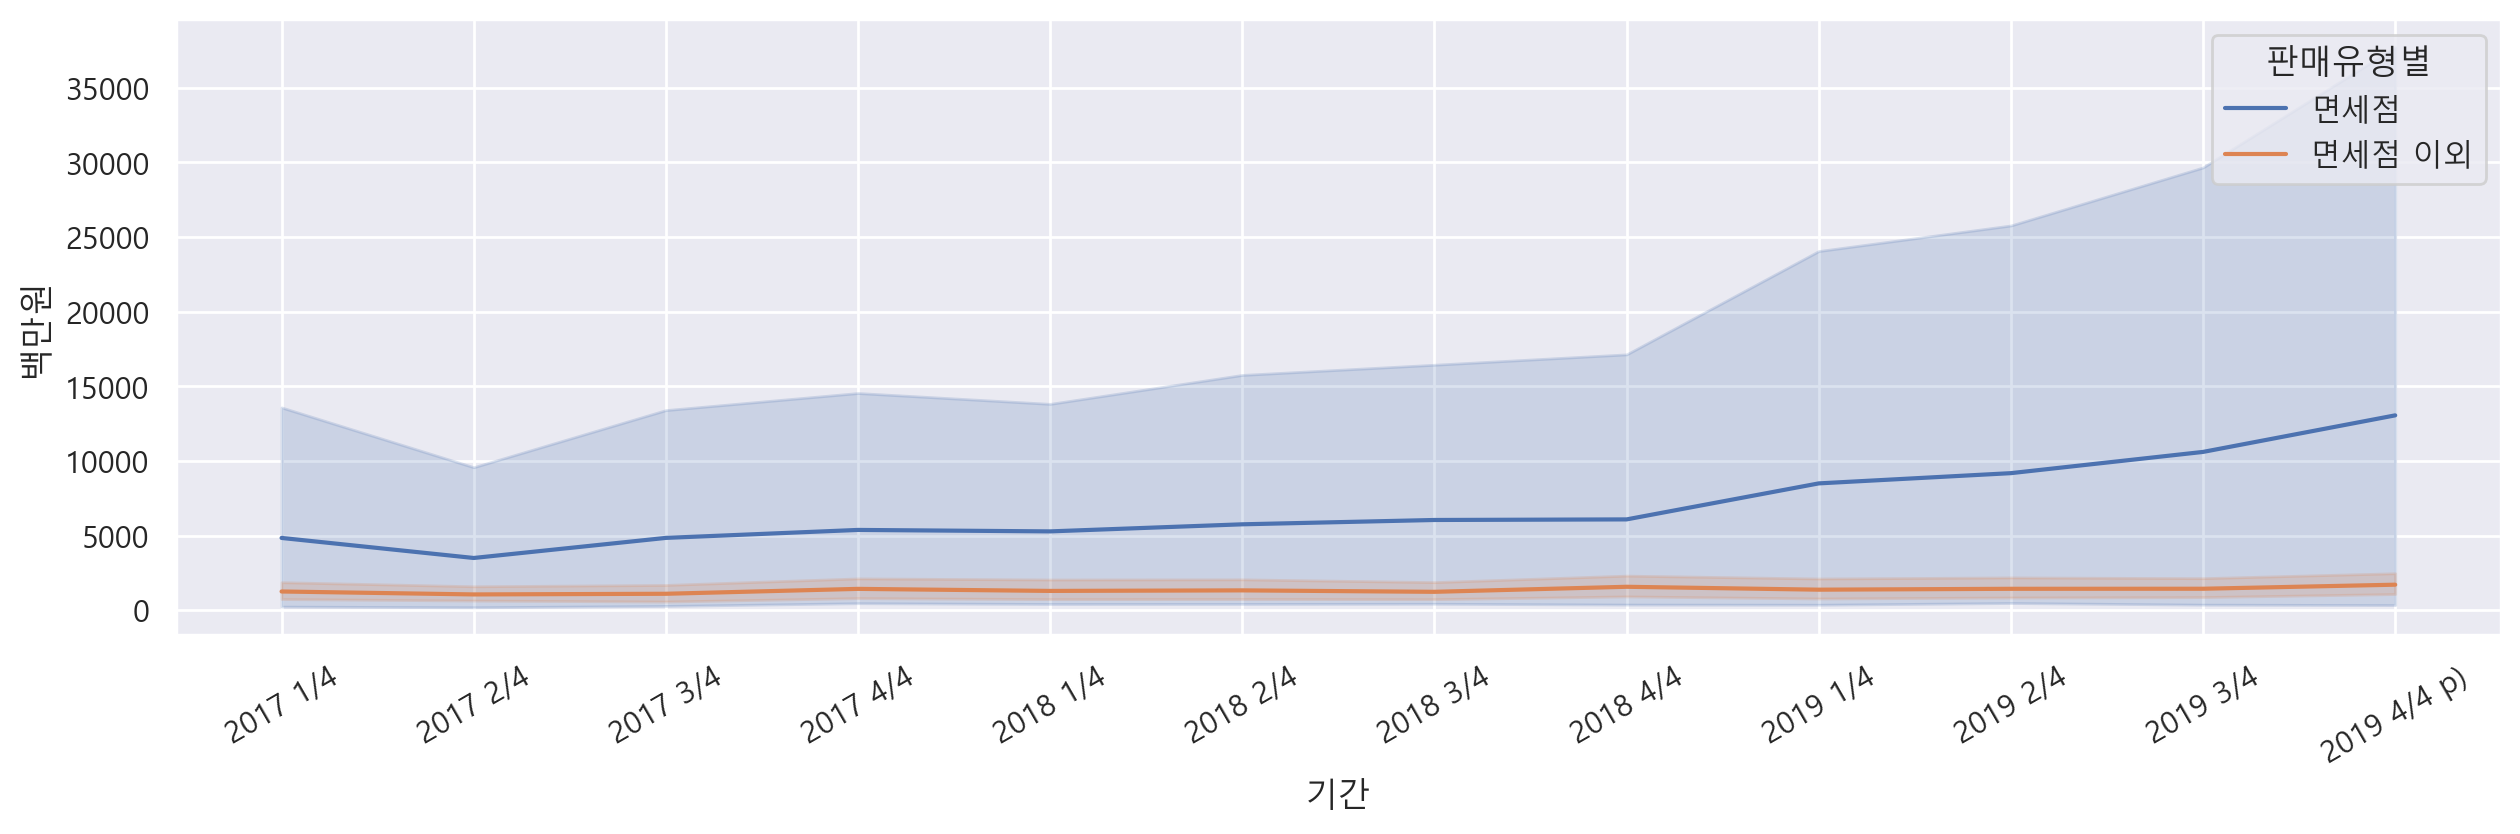

In [41]:
# "계" 데이터를 빼고 기간별 그래프 그리기
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
df_sub = df[df["판매유형별"]!="계"].copy()
sns.lineplot(data=df_sub, x="기간", y="백만원", hue="판매유형별")

<Axes: xlabel='기간', ylabel='백만원'>

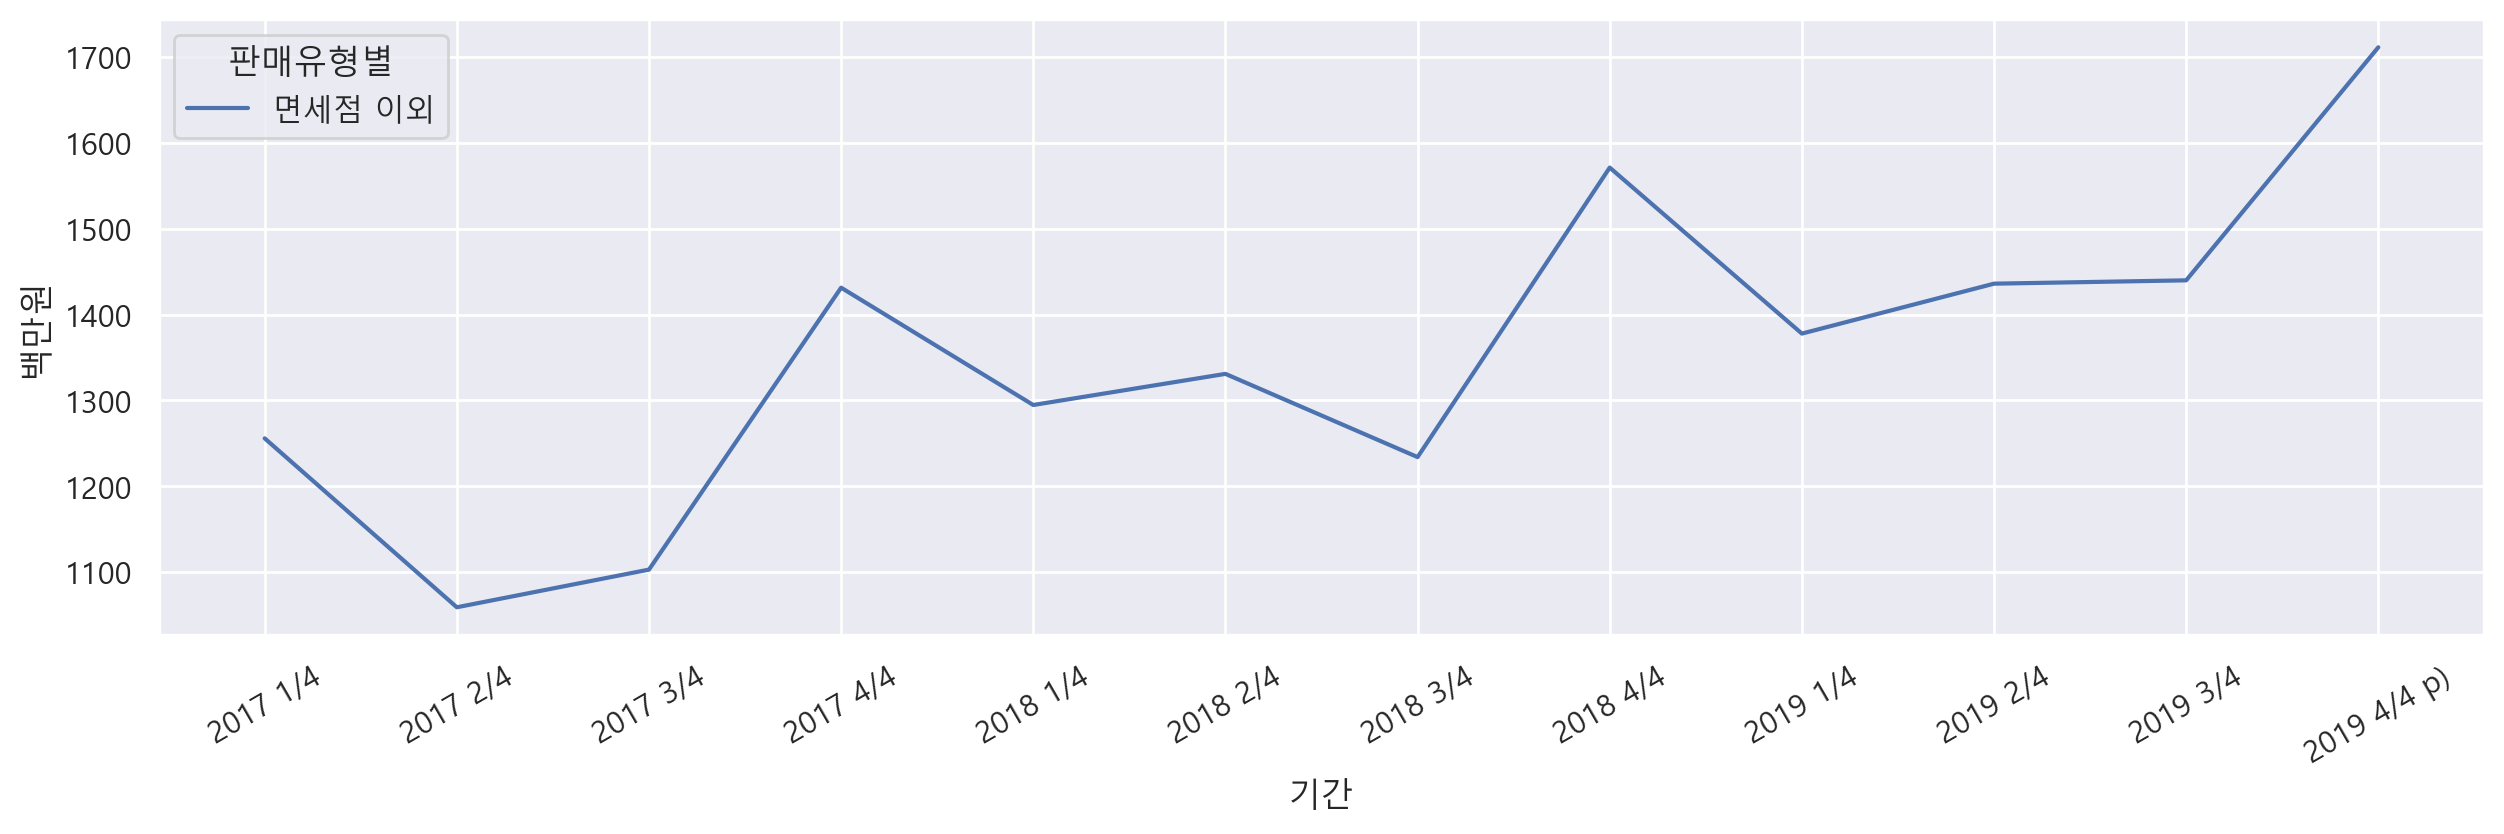

In [42]:
# 면세점도 제외하고 그래프 그리기
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
df_sub = df[(df["판매유형별"]!="계")&(df["판매유형별"]!="면세점")].copy()
sns.lineplot(data=df_sub, x="기간", y="백만원", hue="판매유형별", errorbar=None)

### 의류 및 패션관련 상품 온라인쇼핑 해외직접판매액

In [44]:
# 의류 데이터와 판매유형별이 계인 데이터 df_fashion에 넣기
df_fashion = df[(df["상품군별"]=="의류 및 패션관련 상품")&(df["판매유형별"]=="계")].copy()
df_fashion.head()

국가(대륙)별          상품군별 판매유형별        기간      백만원    연도  분기
66           미국  의류 및 패션관련 상품     계  2014 1/4   9810.0  2014   1
111          중국  의류 및 패션관련 상품     계  2014 1/4  12206.0  2014   1
156          일본  의류 및 패션관련 상품     계  2014 1/4  13534.0  2014   1
201  아세안(ASEAN)  의류 및 패션관련 상품     계  2014 1/4   3473.0  2014   1
246          EU  의류 및 패션관련 상품     계  2014 1/4   1364.0  2014   1

<Axes: xlabel='기간', ylabel='백만원'>

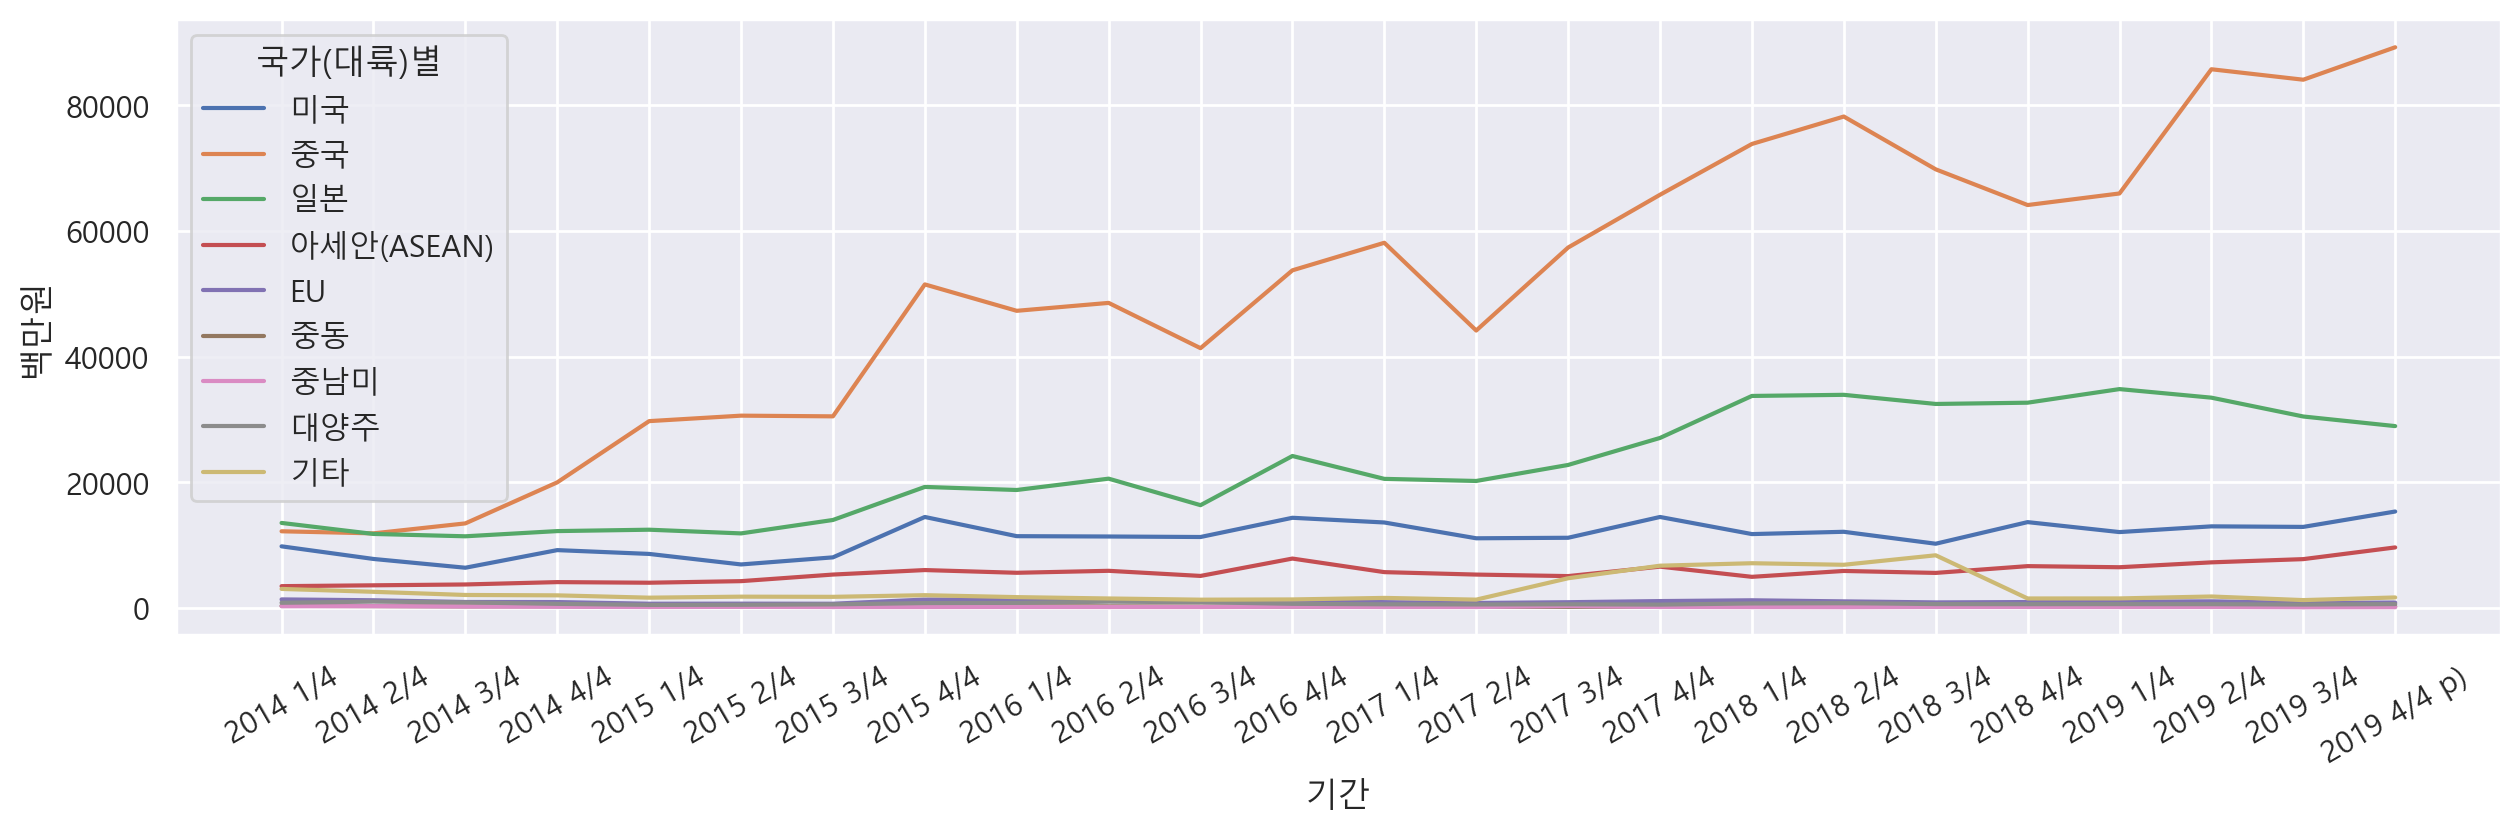

In [45]:
# 기간별 판매액 국가(대륙)별로 색상을 표시한 그래프로 그리기
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df_fashion, x="기간", y="백만원", hue="국가(대륙)별")
# 중국, 일본, 미국, 아세안 순으로 꾸준히 증가

<Axes: xlabel='기간', ylabel='백만원'>

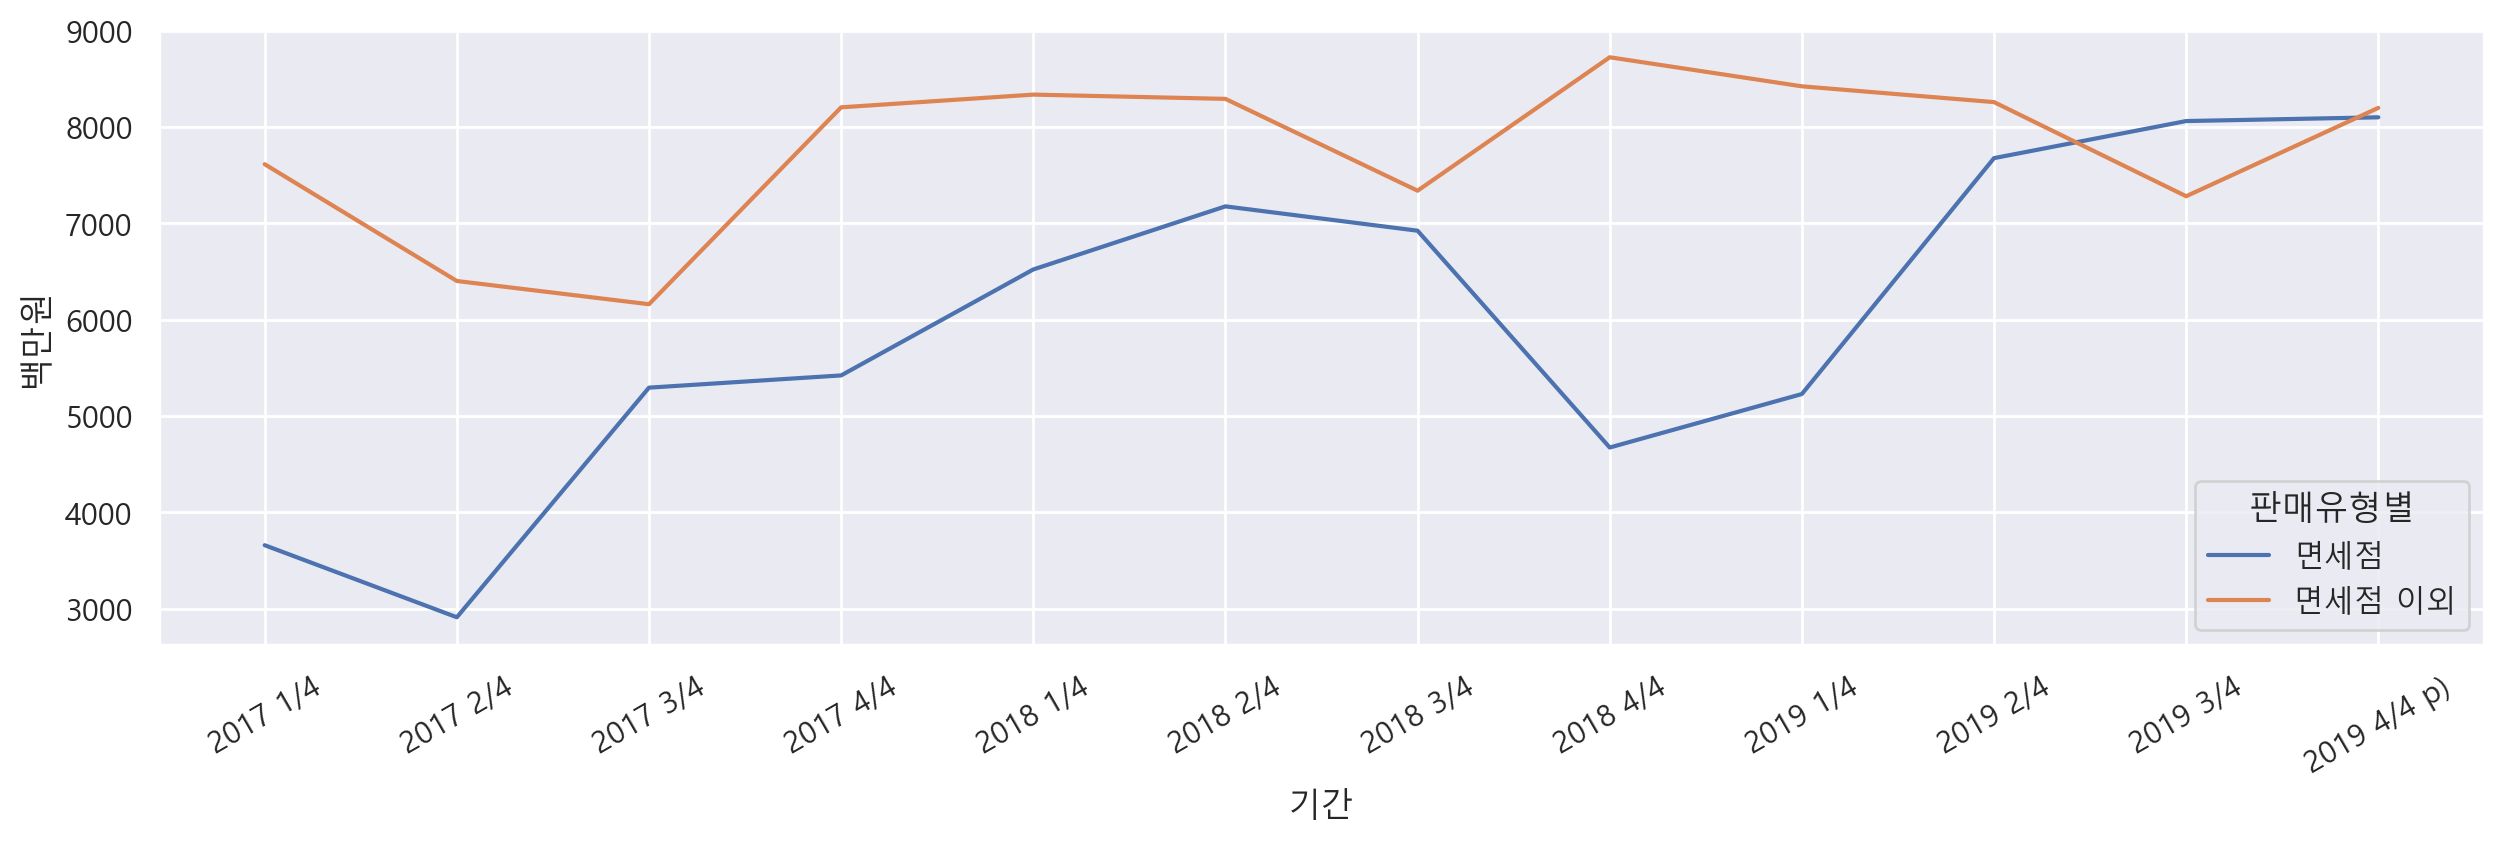

In [46]:
# "계"를 제외하고 그래프 그리기
df_fashion2 = df[(df["상품군별"]=="의류 및 패션관련 상품")&(df["판매유형별"]!="계")].copy()
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_fashion2, x="기간", y="백만원", hue="판매유형별", errorbar=None)

### 데이터 집계하기

In [48]:
# aggfunc 옵션의 기본값이 mean이기 때문에 평균값이 나옴
df_fashion.pivot_table(index="국가(대륙)별", columns="연도", values="백만원")

연도              2014      2015      2016      2017      2018      2019
국가(대륙)별                                                               
EU           1121.25    843.50   1224.75    934.00   1025.50    923.75
기타           2420.75   1812.00   1479.50   3596.75   5973.25   1568.75
대양주           848.00    587.25    850.25    566.50    680.25    595.25
미국           8305.75   9516.50  12112.75  12588.25  11943.50  13331.00
아세안(ASEAN)   3734.00   4909.75   6119.50   5667.75   5771.50   7788.75
일본          12240.00  14398.50  19976.25  22646.00  33202.00  31930.50
중국          14382.75  35584.75  47733.00  56351.75  71499.50  81254.50
중남미           243.75    154.00    162.25    190.50    144.00    135.75
중동            293.00    254.50    242.00    193.00    219.75    231.00

In [49]:
# aggfunc=sum으로 하여 합계값을 계산
df_fashion.pivot_table(index="국가(대륙)별", columns="연도", values="백만원", aggfunc="sum")

연도             2014      2015      2016      2017      2018      2019
국가(대륙)별                                                              
EU           4485.0    3374.0    4899.0    3736.0    4102.0    3695.0
기타           9683.0    7248.0    5918.0   14387.0   23893.0    6275.0
대양주          3392.0    2349.0    3401.0    2266.0    2721.0    2381.0
미국          33223.0   38066.0   48451.0   50353.0   47774.0   53324.0
아세안(ASEAN)  14936.0   19639.0   24478.0   22671.0   23086.0   31155.0
일본          48960.0   57594.0   79905.0   90584.0  132808.0  127722.0
중국          57531.0  142339.0  190932.0  225407.0  285998.0  325018.0
중남미           975.0     616.0     649.0     762.0     576.0     543.0
중동           1172.0    1018.0     968.0     772.0     879.0     924.0

In [50]:
# 판매유형별이 "계"만 있기 때문에 이 데이터를 가공없이 sum을 사용해 연도볗 합계를 알 수 있다
df_fashion["판매유형별"].value_counts()

판매유형별
계    216
Name: count, dtype: int64

<Axes: xlabel='연도', ylabel='국가(대륙)별'>

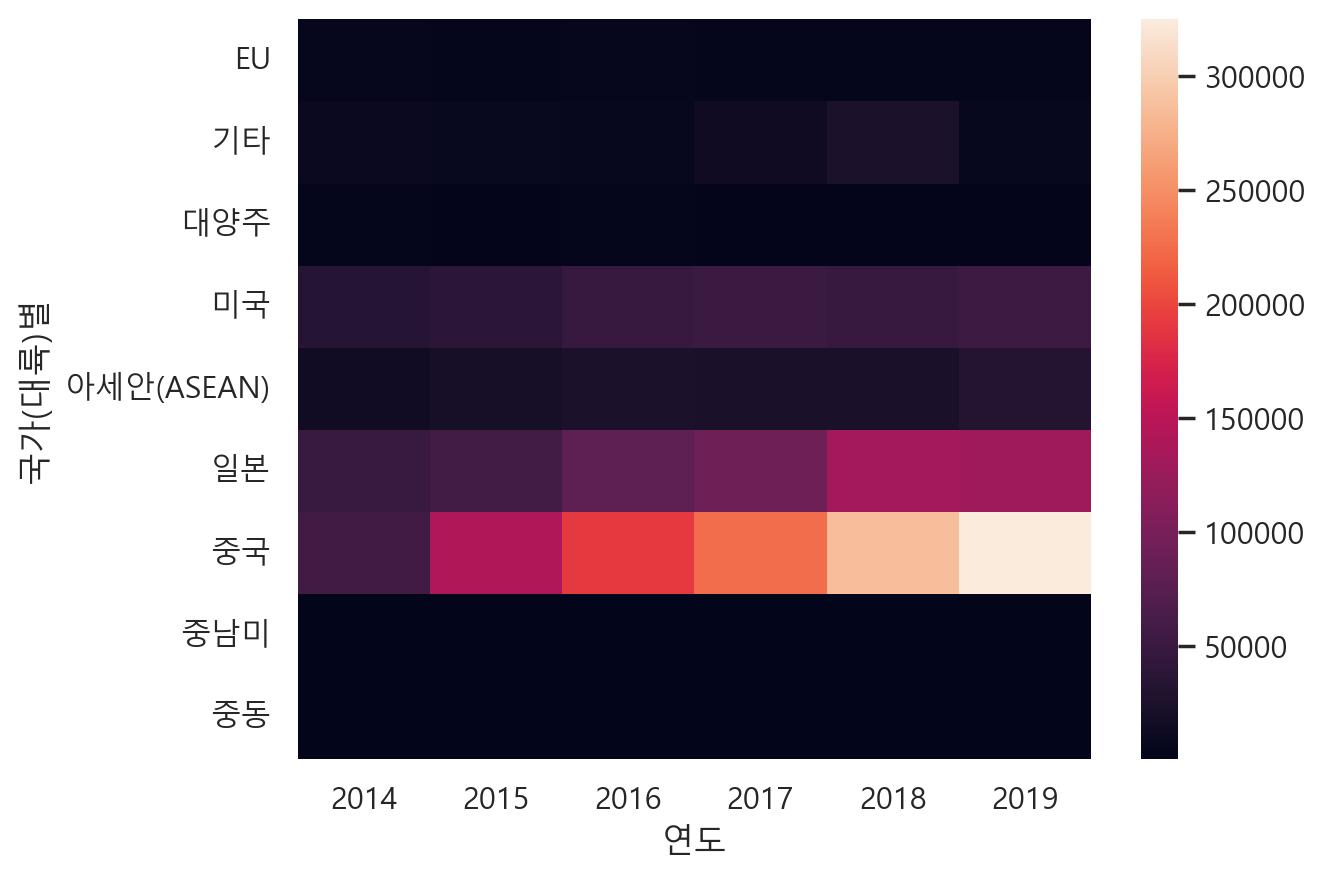

In [51]:
# 위에서 구한 연도별 국가/대륙별 합계를 result라는 변수에 저장
# heatmap을 사용해 분포를 색상으로 편하게 볼 수 있음
result = df_fashion.pivot_table(index="국가(대륙)별", columns="연도", values="백만원", aggfunc="sum")
sns.heatmap(result)

<Axes: xlabel='연도', ylabel='국가(대륙)별'>

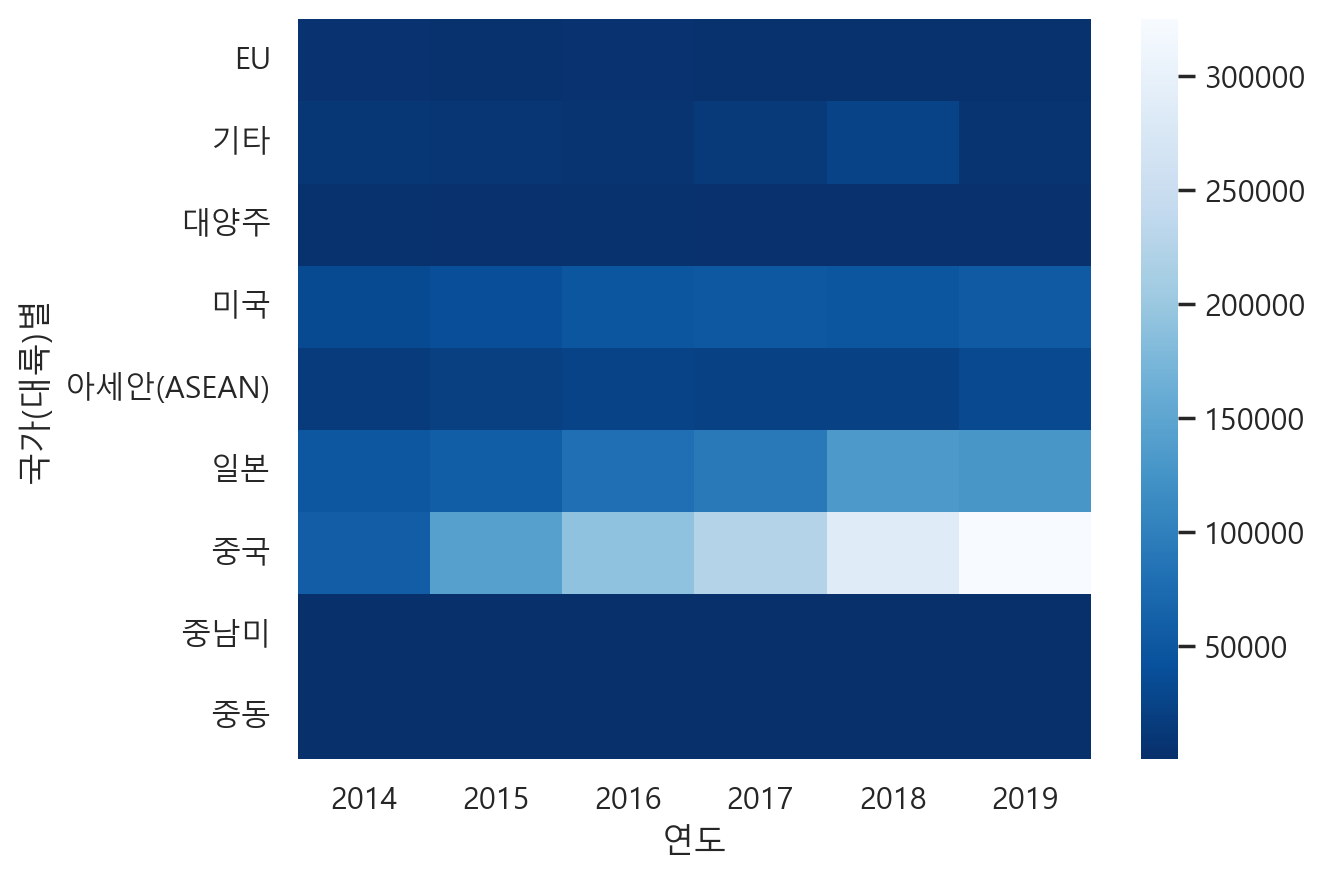

In [52]:
# cmap 옵션으로 색상 변경
sns.heatmap(result, cmap="Blues_r")

<Axes: xlabel='연도', ylabel='국가(대륙)별'>

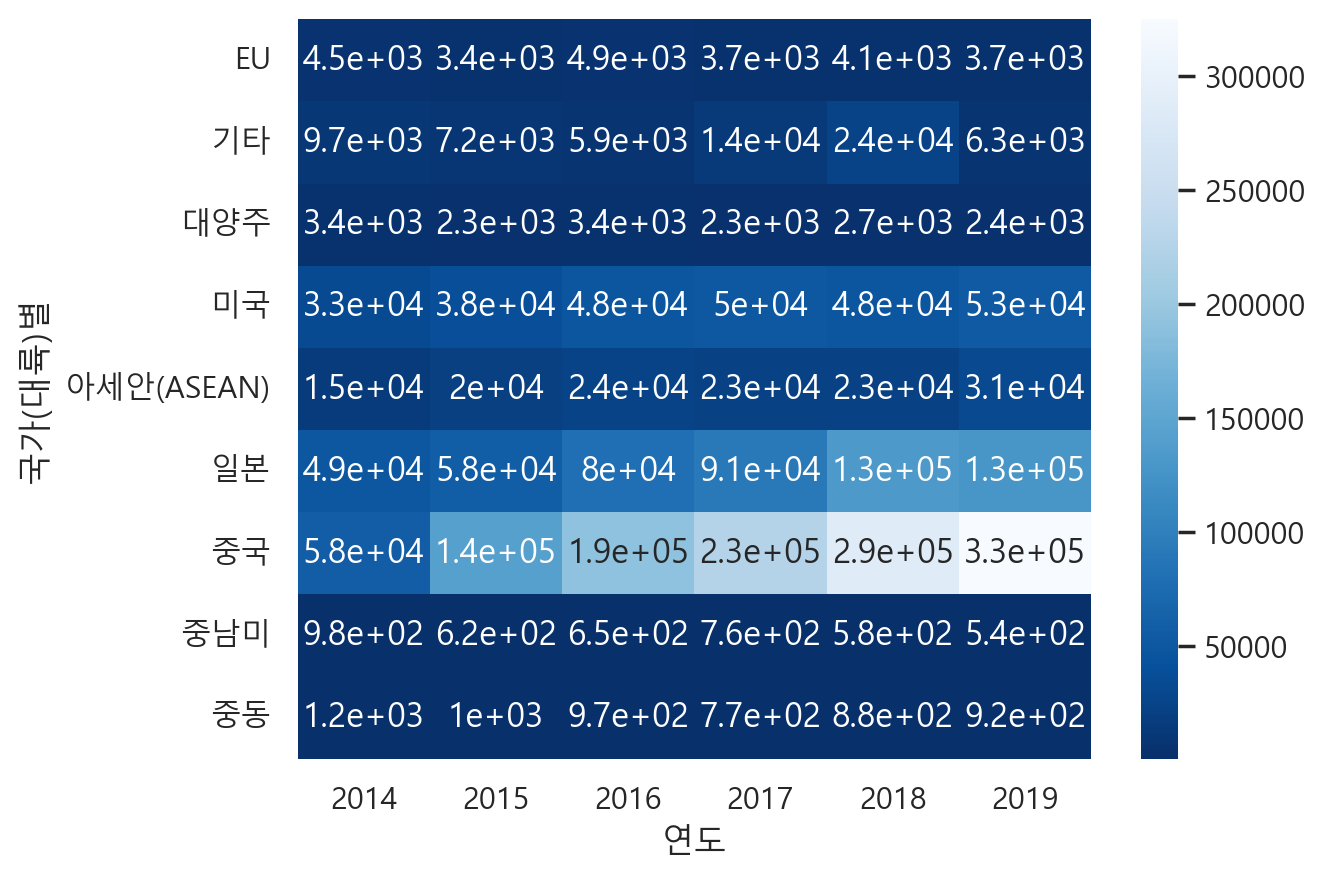

In [53]:
# annot 옵션으로 수치 표시
sns.heatmap(result, cmap="Blues_r", annot=True)

<Axes: xlabel='연도', ylabel='국가(대륙)별'>

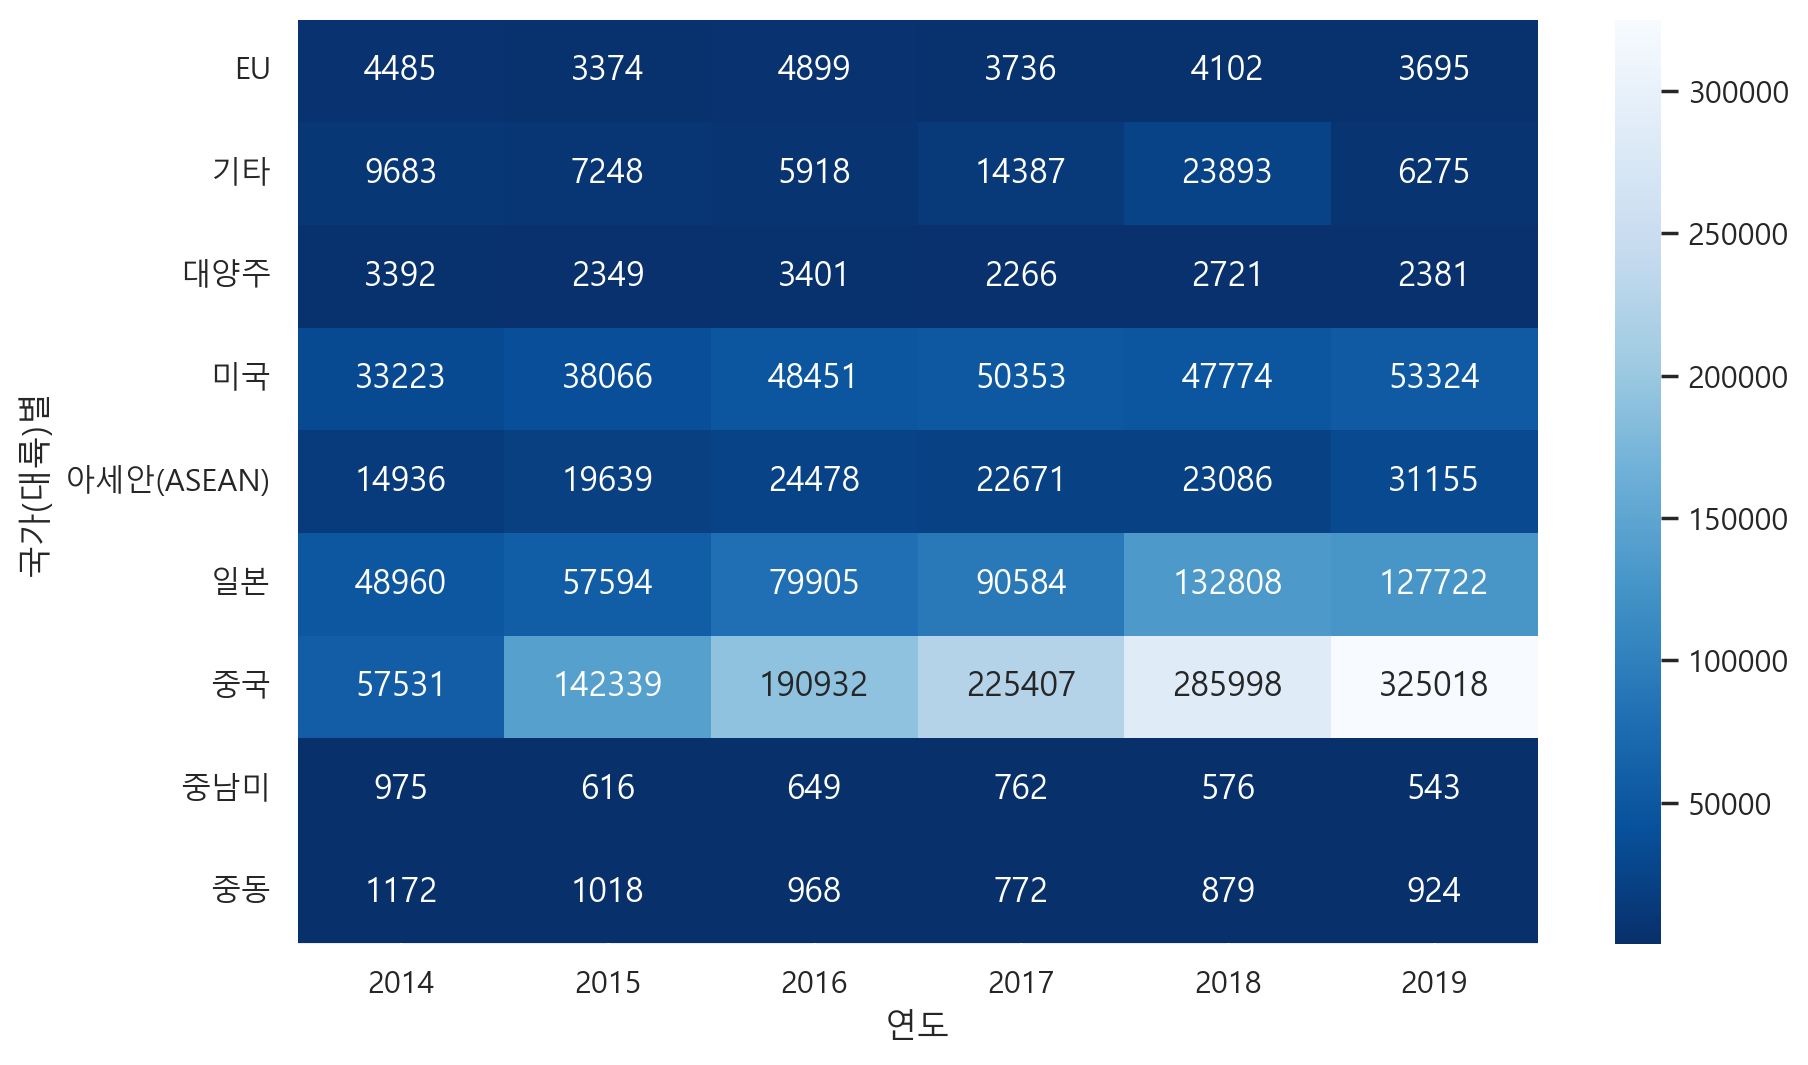

In [54]:
# fmt 옵션으로 소숫점 없이 float형의 숫자 나타낼 수 있음
plt.figure(figsize=(10,6))
sns.heatmap(result, cmap="Blues_r", annot=True, fmt=".0f")

### 연산결과를 시각적으로 보기

<Axes: xlabel='연도', ylabel='백만원'>

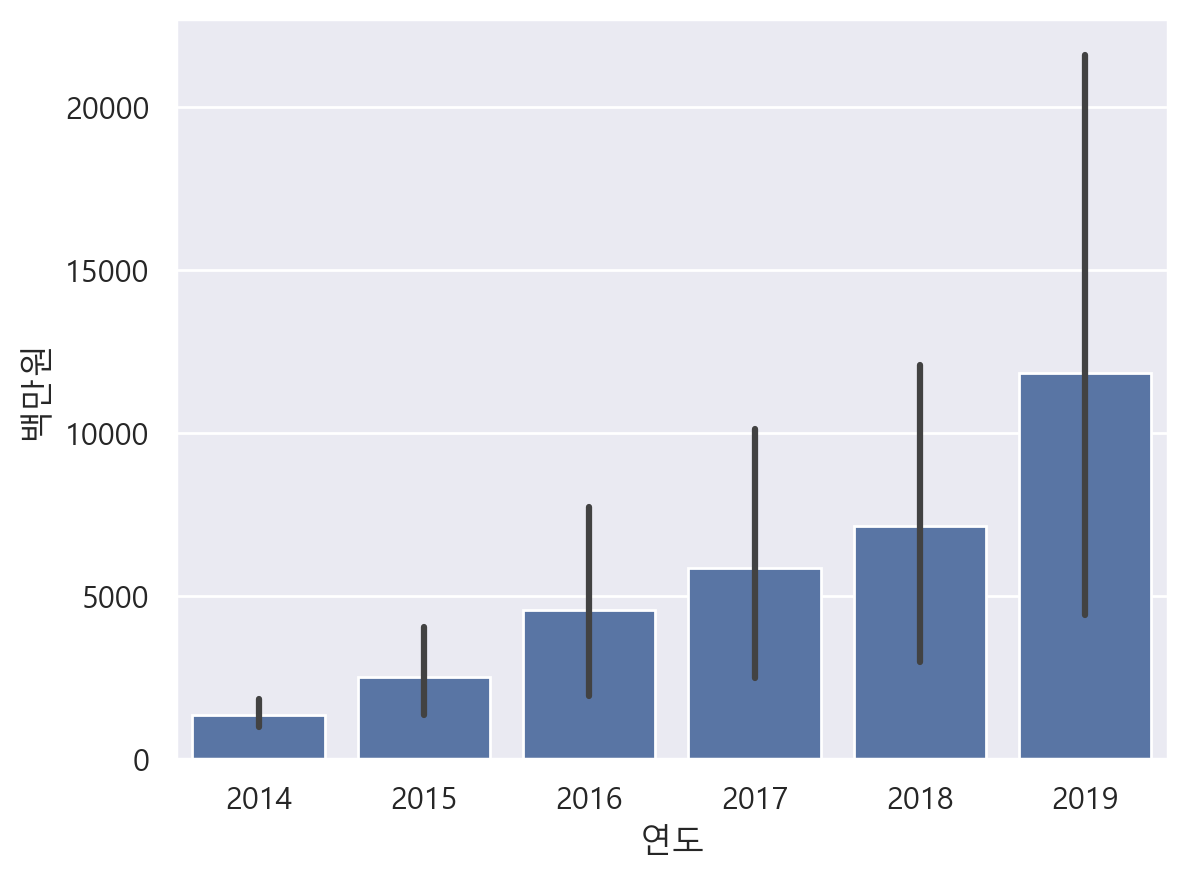

In [56]:
# 판매유형별이 "계"인 데이터만 모인 df_total 활용해 막대그래프 그리기
# estimator라는 옵션은 기본으로 mean(평균)값을 구함
sns.barplot(data=df_total, x="연도", y="백만원")
# 판매액이 꾸준히 증가, 신뢰구간도 연도에 따라 길어짐

<Axes: xlabel='연도', ylabel='백만원'>

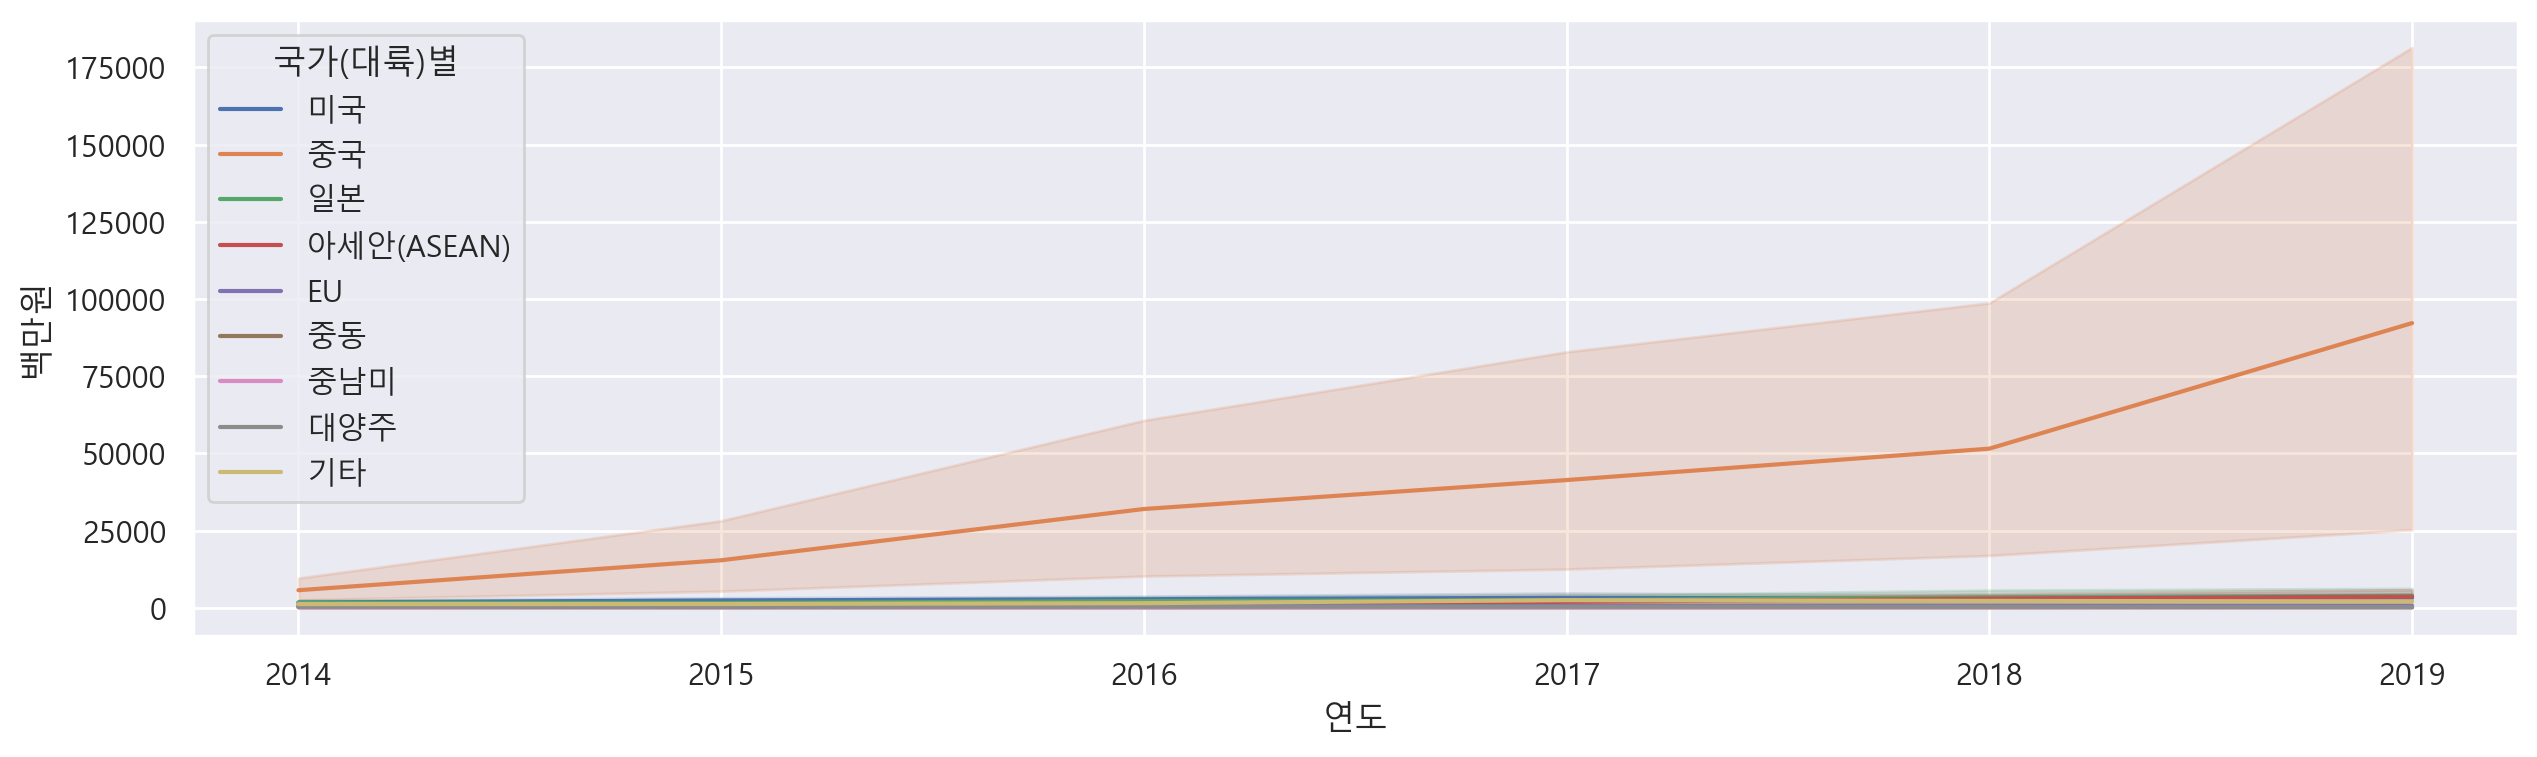

In [57]:
# barplot 대신 lineplot으로 그리기
plt.figure(figsize=(15,4))
sns.lineplot(data=df_total, x="연도", y="백만원", hue="국가(대륙)별")

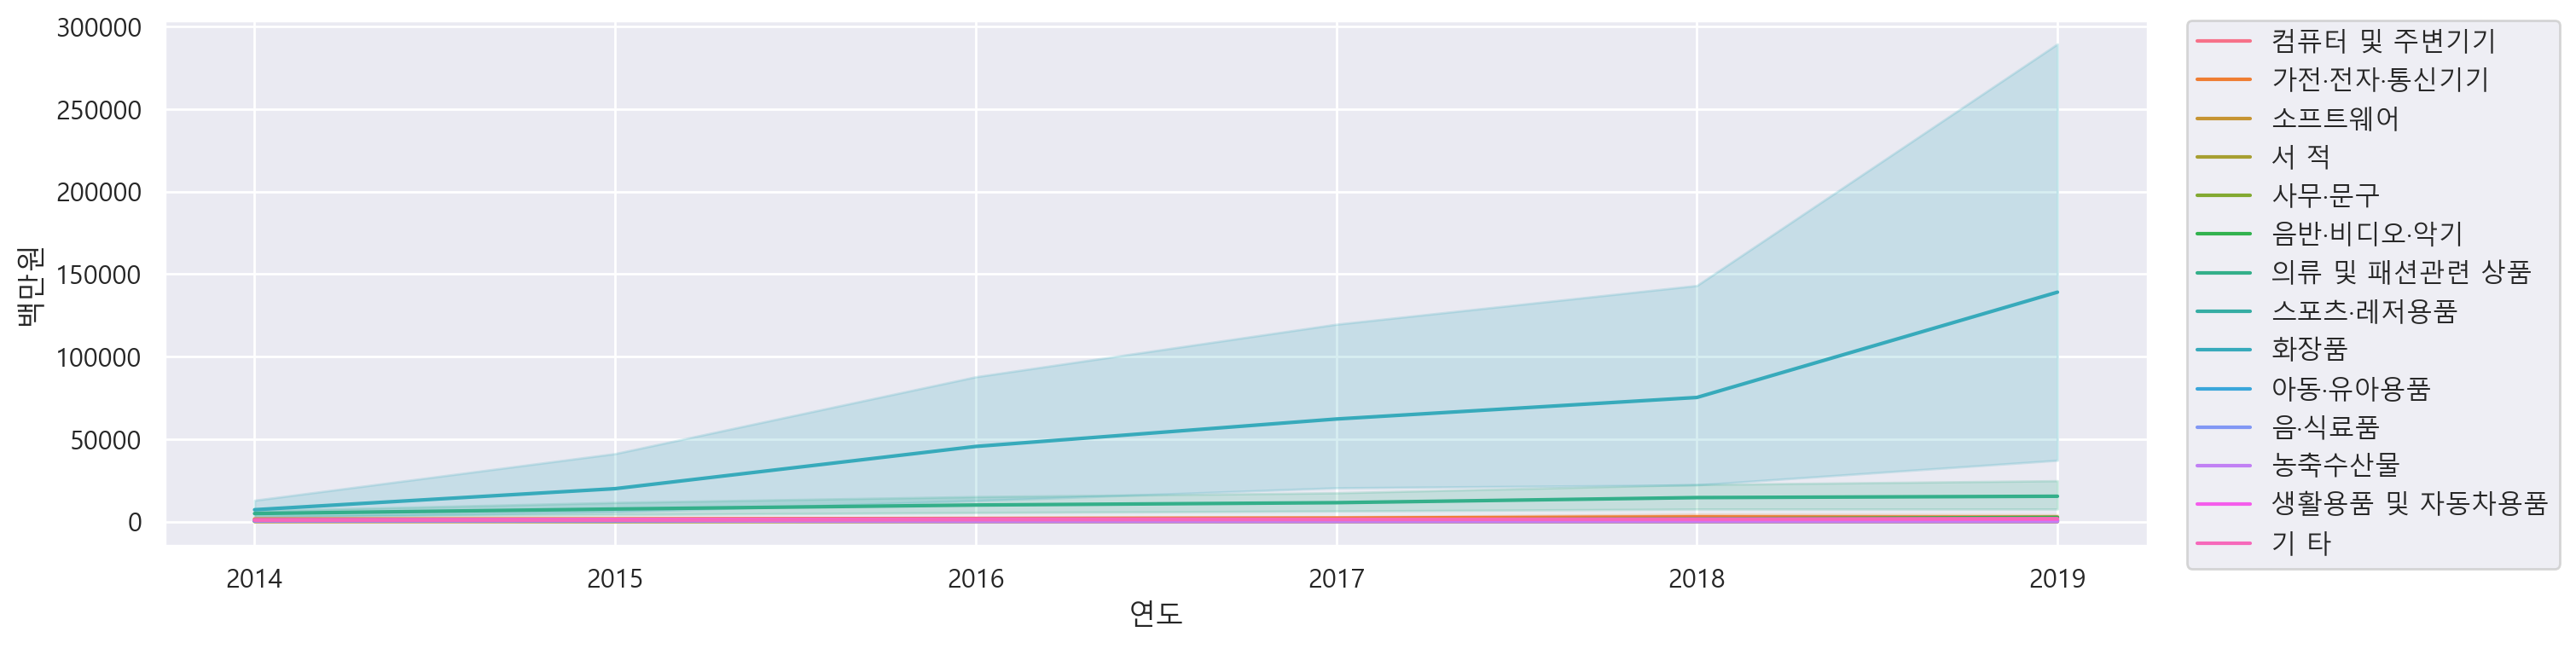

In [58]:
# 연도별 판매액을 "상품군별"로 다른 색상으로 표현
# plt.legend()함수를 사용해 legend 그래프를 밖에 그림
# bbox_to_anchor를 변경하면 그래프와 범례 사이의 간격 조절 가능
plt.figure(figsize=(15,4))
sns.lineplot(data=df_total, x="연도", y="백만원", hue="상품군별")
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0)

## 전체 상품군별로 온라인쇼핑 해외직접판매액은 증가했을까?

In [60]:
plt.figure(figsize=(15, 4))


<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

* lengend를 그래프의 밖에 그리기 : [matplotlib - Move legend outside figure in seaborn tsplot - Stack Overflow](https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot)

In [62]:
plt.figure(figsize=(15, 4))


<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>